## SC1015 B124 Group 2 Mini Project -- Predict Student Performance from Game Play  
<b>Members:</b>
* Sun Ming Zhong (U2110180j)
* He Haoshen (U2123053D)
* Huang Caihong (U2222629H)
 


# 1. Preprocessing

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## 1.1 Predictor data - train.csv

In [2]:
data = pd.read_csv("train.csv")

## Predictor data - EDA

In [3]:
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      float64
 17  hq              float64
 18  music           float64
 19  level_group     object 
dtypes: float64(9), int64(4), object(7)
memory usage: 2.0+ GB


The following are some observations from a quick glance of the dataset
* There are `20` variables/features/columns
* There are `13174211` observations/samples/rows
* All seem to be predictor variables.     
* There are `4` variables identified as `int64`.
* There are `7` variables identified as `object`.
* There are `9` variables identified as `float64`.

The memory usage is over 2GB.

In [5]:
data.describe(include='all')

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
count,1.317421e+07,1.317421e+07,1.317421e+07,13174211,13174211,1.317421e+07,284746.000000,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06,4806891,9014563,13174211,4806945,0.0,0.0,0.0,13174211
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594,127,19,126,NaN,NaN,NaN,3
top,NaN,NaN,NaN,navigate_click,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,worker,tunic.historicalsociety.entry,tunic.historicalsociety.cage.confrontation,NaN,NaN,NaN,13-22
freq,NaN,NaN,NaN,5687896,6377305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178294,939555,1816202,333363,NaN,NaN,NaN,6746397
mean,2.113413e+16,6.526426e+02,3.846817e+06,NaN,NaN,1.219194e+01,3.157930,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.665220e+14,6.275818e+02,2.701387e+07,NaN,NaN,6.499188e+00,2.064042,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.101031e+16,2.890000e+02,4.394300e+05,NaN,NaN,6.000000e+00,1.000000,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.104022e+16,5.960000e+02,1.013425e+06,NaN,NaN,1.300000e+01,3.000000,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.110051e+16,8.970000e+02,1.740050e+06,NaN,NaN,1.800000e+01,5.000000,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def print_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        print(f"{column} : {unique_values}")

print_unique_values(data, ['event_name', 'level_group', 'name', 'level', 'page', 'text', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group'])

event_name : ['cutscene_click' 'person_click' 'navigate_click' 'observation_click'
 'notification_click' 'object_click' 'object_hover' 'map_hover'
 'map_click' 'checkpoint' 'notebook_click']
level_group : ['0-4' '5-12' '13-22']
name : ['basic' 'undefined' 'close' 'open' 'prev' 'next']
level : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
page : [nan  0.  1.  3.  4.  5.  6.  2.]
text : ['undefined' 'Whatcha doing over there, Jo?' 'Just talking to Teddy.'
 'I gotta run to my meeting!' 'Can I come, Gramps?'
 'Sure thing, Jo. Grab your notebook and come upstairs!'
 'See you later, Teddy.' "I get to go to Gramps's meeting!"
 'Now where did I put my notebook?' '\\u00f0\\u0178\\u02dc\\u00b4' nan
 'I love these photos of me and Teddy!' 'Found it!'
 'Gramps is in trouble for losing papers?' "This can't be right!"
 'Gramps is a great historian!' "Hmm. Button's still not working."
 "Let's get started. The Wisconsin Wonders exhibit opens tomorrow!"
 'Who wants to investiga

room_fqid : ['tunic.historicalsociety.closet' 'tunic.historicalsociety.basement'
 'tunic.historicalsociety.entry' 'tunic.historicalsociety.collection'
 'tunic.historicalsociety.stacks' 'tunic.kohlcenter.halloffame'
 'tunic.capitol_0.hall' 'tunic.historicalsociety.closet_dirty'
 'tunic.historicalsociety.frontdesk' 'tunic.humanecology.frontdesk'
 'tunic.drycleaner.frontdesk' 'tunic.library.frontdesk'
 'tunic.library.microfiche' 'tunic.capitol_1.hall'
 'tunic.historicalsociety.cage' 'tunic.historicalsociety.collection_flag'
 'tunic.wildlife.center' 'tunic.flaghouse.entry' 'tunic.capitol_2.hall']
text_fqid : ['tunic.historicalsociety.closet.intro'
 'tunic.historicalsociety.closet.gramps.intro_0_cs_0'
 'tunic.historicalsociety.closet.teddy.intro_0_cs_0' nan
 'tunic.historicalsociety.closet.teddy.intro_0_cs_5'
 'tunic.historicalsociety.closet.photo'
 'tunic.historicalsociety.closet.notebook'
 'tunic.historicalsociety.closet.retirement_letter.hub'
 'tunic.historicalsociety.basement.janitor'
 

Upon analysing the data description and its unique value, the following are some observations:
* Structured Data
    * Numberic Data
        * room_coor_x
        * room_coor_y
        * screen_coor_x
        * screen_coor_y
    * Categorical Data
        * session_id
        * index
        * event_name
        * name
        * level
        * page
        * room_fqid
        * text_fqid
        * fullscreen
        * hq
        * music
        * level_group
    * Time Series Data
        * elapsed_time
        * hover_duration
* Unstructured Data
    * Text Data
        * text

The representation of the columns are as follows:
* session_id : The ID of the session the event took place in (can be classified as an unique player)
* index : The index of the event for the session
* elapsed_time : Time passed (in milliseconds) between the start of the session and when the event was recorded
* room_coor_x : The horizontal coordinates of the click in reference to the in-game room (only for click events)
* room_coor_y : The vertical coordinates of the click in reference to the in-game room (only for click events)
* screen_coor_x : The horizontal coordinates of the click in reference to the player’s screen (only for click events)
* screen_coor_y : The vertical coordinates of the click in reference to the player’s screen (only for click events)
* hover_duration : Amount of time (in milliseconds) the hover happened for (only for hover events)
* event name : The name of the action done by the player
* name : Elaborated action of `notebook_click` done by the player
* level : The level of the game the event occurred in
* page : The page number of notebook-related events
* text : Text the player sees during the gameplay
* room_fqid : The fully qualified ID of the room the event took place in
* text_fqid : The fully qualified ID of the text the event took place in
* fullscreen : Whether the player is in fullscreen mode
* hq : Whether the game is in high-quality
* music : Whether the game music is on or off
* level_group : Scenario - group of questions

`fullscreen`, `hq`, and `music` have no data as they only have `NaN` as its value

                session_id     index  elapsed_time     level      page  \
session_id        1.000000 -0.051681      0.020592 -0.001359  0.025938   
index            -0.051681  1.000000      0.076249  0.572491  0.242650   
elapsed_time      0.020592  0.076249      1.000000  0.089829  0.088839   
level            -0.001359  0.572491      0.089829  1.000000  0.948628   
page              0.025938  0.242650      0.088839  0.948628  1.000000   
room_coor_x       0.000245 -0.005838     -0.003381 -0.048371  0.003165   
room_coor_y      -0.004962 -0.135469     -0.019823 -0.238521 -0.094238   
screen_coor_x     0.006690  0.024571      0.000277  0.031491  0.006282   
screen_coor_y     0.009943  0.025236      0.001249  0.047835 -0.006073   
hover_duration    0.001087 -0.002589      0.012441 -0.003141       NaN   
fullscreen             NaN       NaN           NaN       NaN       NaN   
hq                     NaN       NaN           NaN       NaN       NaN   
music                  NaN       NaN  

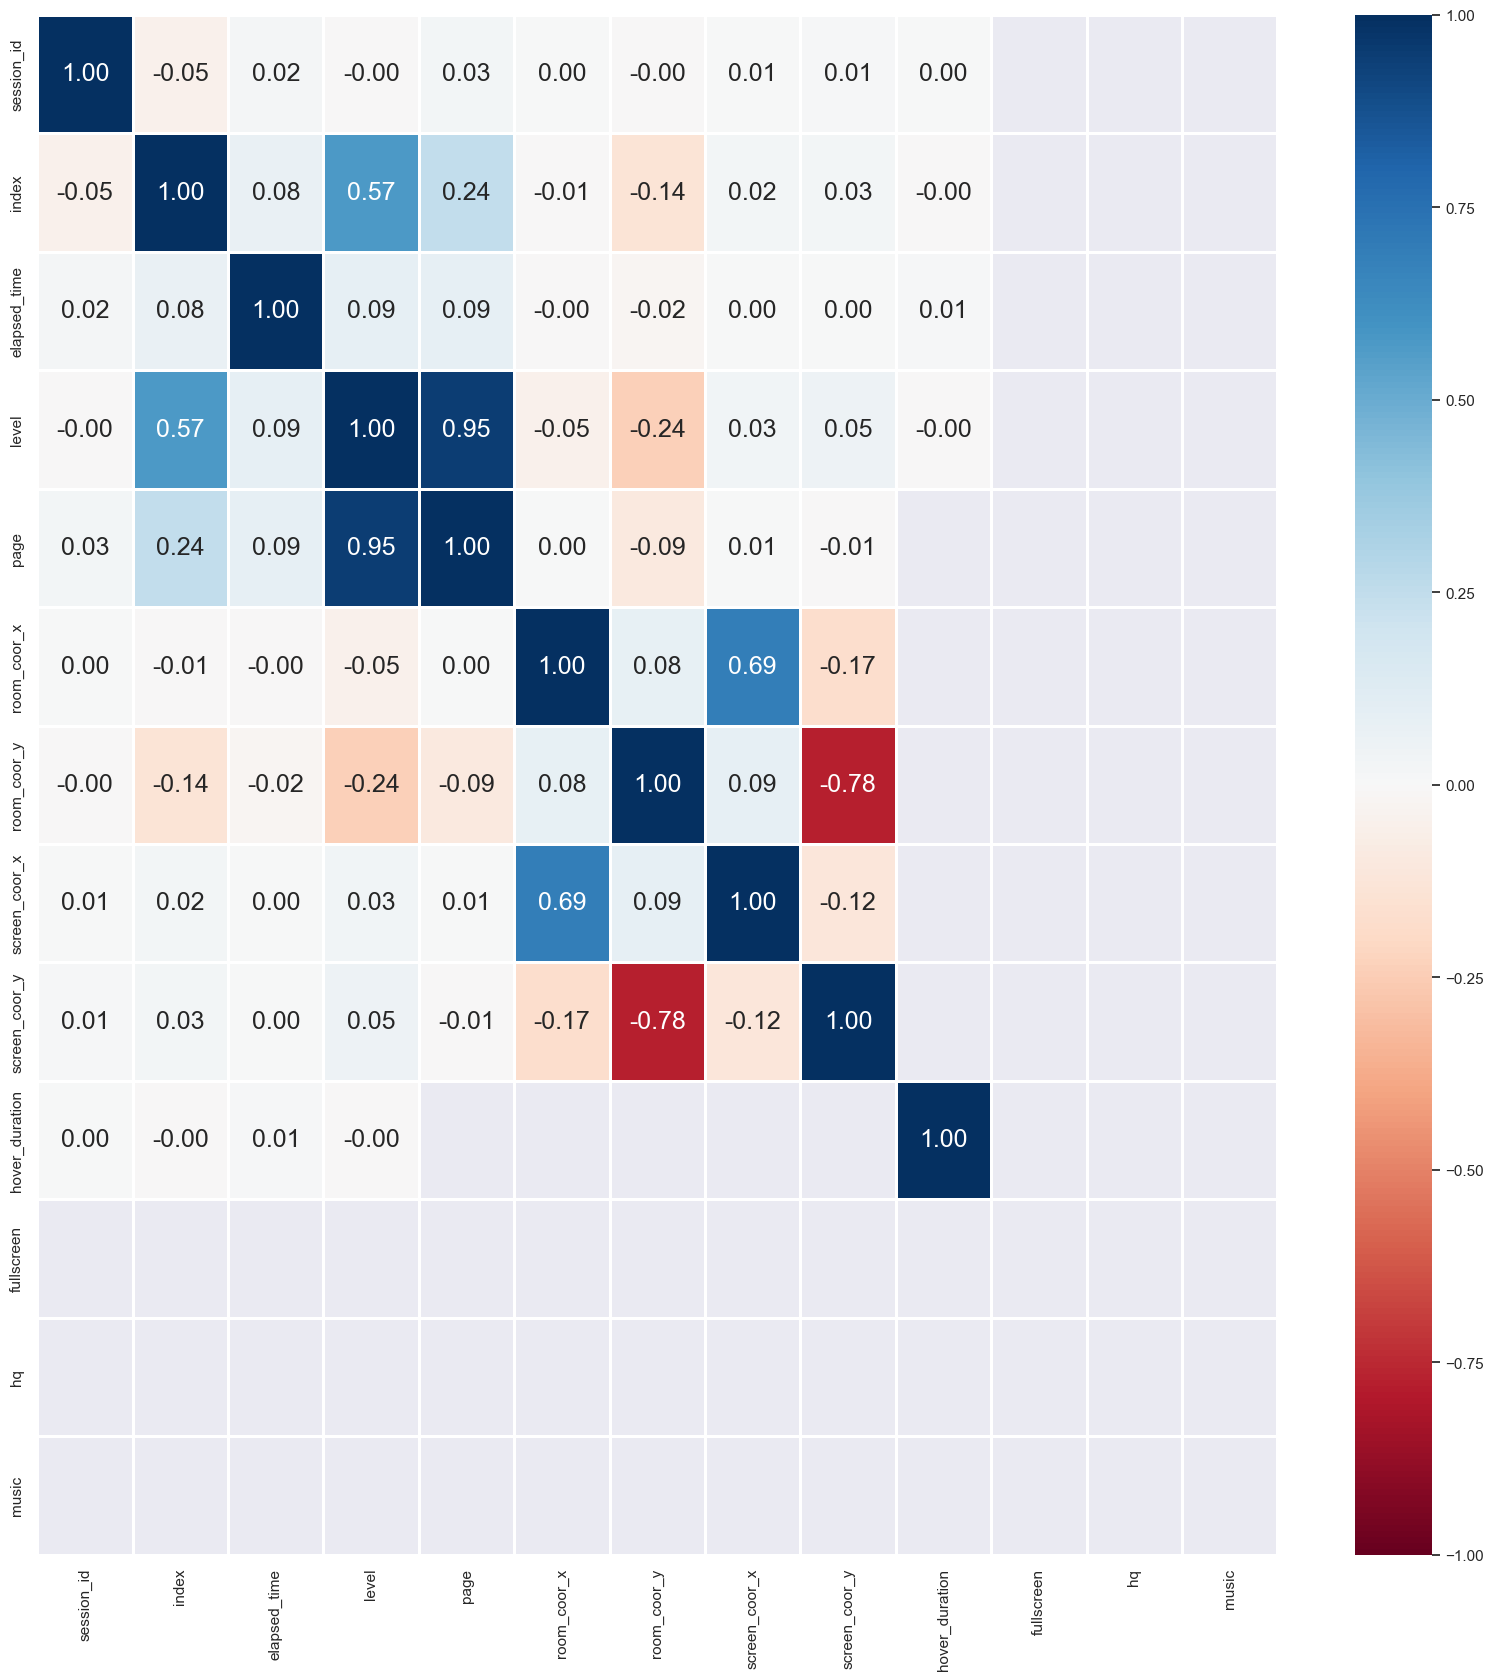

In [7]:
# Correlation Matrix
print(data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show()

* `fullscreen`, `hq`, and `music` do not have any value
* Screen & Room coordinates relatively strong relationship
    * Potentially able to use these variables to infer the value of `fullscreen`
* `page` and `level` also have strong correlation


## Predictor data - Preprocessing

From the EDA overview of the dataset, the following 2 steps can be done to reduce the memory usage:
- Remove columns with no useful data
    - `music`, `hq` and `fullscreen` variables seem to only have `NaN` as its value
- Change datatypes of certain variables
    - Reduce the number of bits allocated to each variable if data do not utilize it

### Remove columns with just 'NaN' as values

In [8]:
# Drop columns with NaN only
data = data.drop(['music','hq','fullscreen'], axis=1)
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


### Change Variables' datatype

In [9]:
data['elapsed_time'] = data['elapsed_time'].astype(np.uint32)
data['level'] = data['level'].astype(np.uint8)
data['room_coor_x'] = data['room_coor_x'].astype(np.float32)
data['room_coor_y'] = data['room_coor_y'].astype(np.float32)
data['screen_coor_x'] = data['screen_coor_x'].astype(np.float32)
data['screen_coor_y'] = data['screen_coor_y'].astype(np.float32)
data['hover_duration'] = data['hover_duration'].astype(np.float32)


columns_to_convert = ['session_id','event_name','name','text','fqid','room_fqid','text_fqid','level_group']

for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 17 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      category
 1   index           int64   
 2   elapsed_time    uint32  
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  level_group     category
dtypes: category(8), float32(5), float64(1), int64(1), uint32(1), uint8(1)
memory usage: 653.7 MB


After performing preprocessing, the following are some observations from the dataset
* There are `17` variables/features/columns
    * reduced by 3 as it does not contain any value
* There are `13174211` observations/samples/rows
* There are `1` variables identified as `int64`.
* There are `1` variables identified as `uint32`, which is unsigned integer of 32 bits.
* There are `1` variables identified as `uint8`, which is unsigned integer of 8 bits.
* There are `8` variables identified as `category`, which is object.
* There are `5` variables identified as `float32`.

The memory usage have been reduced significantly to be under 700MB, which is about 70% reduction.

# 1.2 Response data - train_labels.csv

In [10]:
responseData = pd.read_csv("train_labels.csv")

## Response data - EDA

In [11]:
responseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  212022 non-null  object
 1   correct     212022 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


In [12]:
responseData.describe(include='all')

,session_id,correct
count,212022,212022.000000
unique,212022,NaN
top,20090312431273200_q1,NaN
freq,1,NaN
mean,NaN,0.703946
std,NaN,0.456516
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [13]:
responseData.head(100)

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
...,...,...
95,20100111290365256_q1,0
96,20100111293440890_q1,1
97,20100111315145150_q1,1
98,20100111354105336_q1,1


The following are some observations from a quick glance of the dataset
* There are `2` variables/features/columns
* There are `212022` observations/samples/rows
* `correct` seem to be response variable     
* There are `1` variables identified as `int64`
* There are `1` variables identified as `object`

### Question-wise average accuracy rate

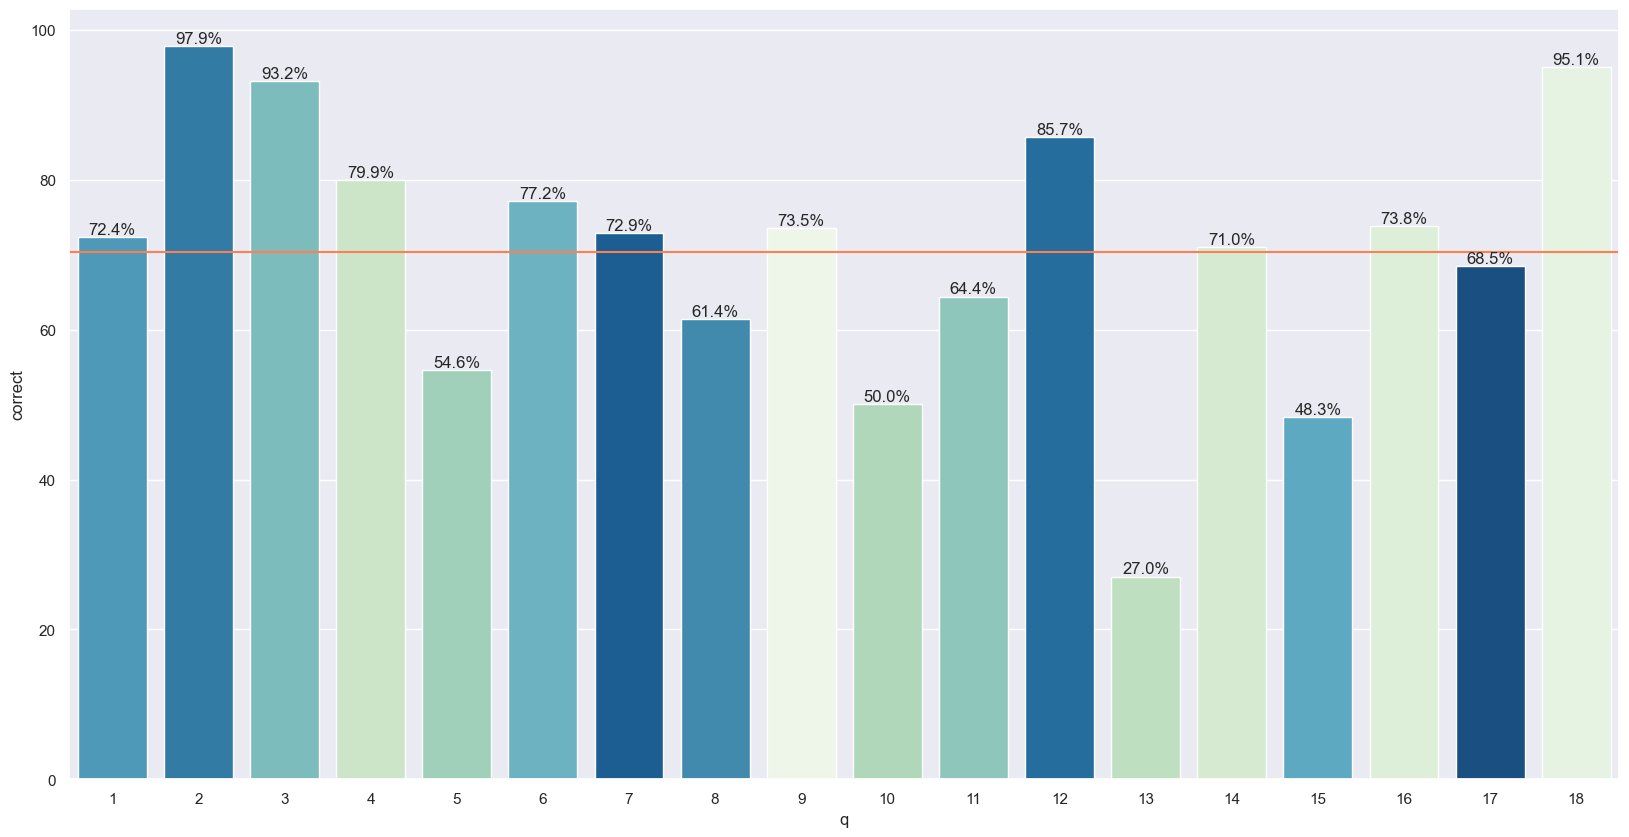

In [14]:
responseData["session"] = responseData["session_id"].apply(lambda x:int(x.split('_')[0]))
responseData["q"] = responseData["session_id"].apply(lambda x:int(x.split('_')[1][1:]))
responseData.head()

q_corr = responseData.groupby("q")["correct"].mean().mul(100).to_frame().reset_index()
mean_correct = responseData['correct'].mean()*100
pal = sb.color_palette("GnBu", len(q_corr))
rank = q_corr.sort_values('q')['correct'].argsort()
plt.figure(figsize=(20, 10))
g = sb.barplot(data=q_corr,x="q",y="correct",palette=np.array(pal[::])[rank])
g.bar_label(g.containers[0], fmt="%.1f%%")
g.axhline(mean_correct, color="coral")
del mean_correct,pal,rank,g,q_corr

### Question-wise Correct Answer Count

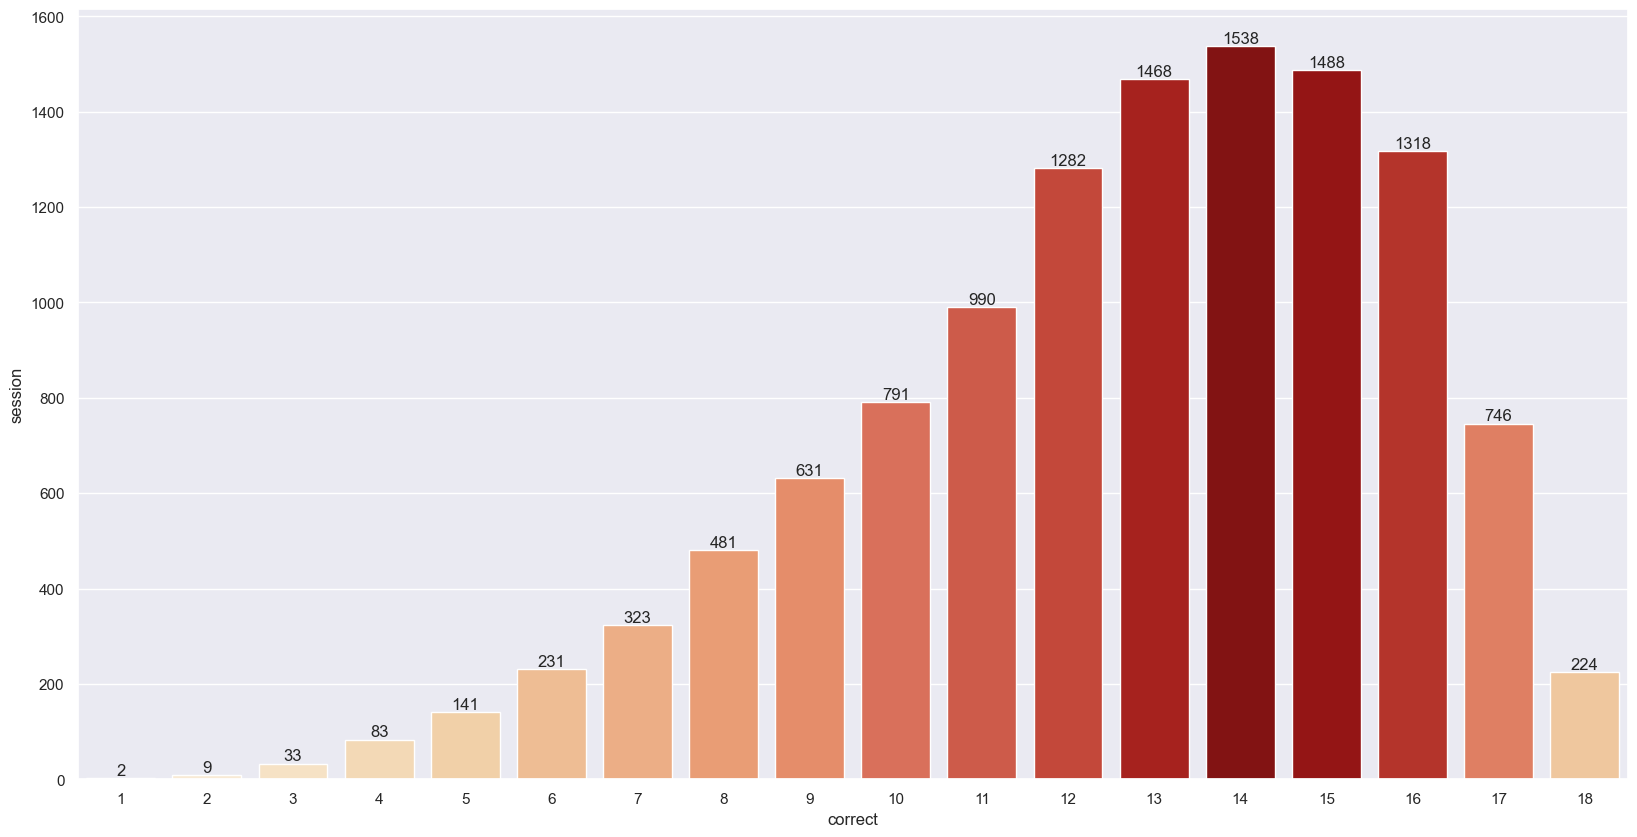

In [15]:
correct = responseData[responseData["correct"]==1]
session_correct = correct.groupby("session")["correct"].sum().to_frame().reset_index()
session_count = session_correct.groupby("correct")["session"].count().to_frame().reset_index()
pal = sb.color_palette("OrRd", len(session_count))
rank = session_count.sort_values('session')['correct'].argsort()
plt.figure(figsize=(20, 10))
g = sb.barplot(data=session_count,x="correct",y="session",palette=np.array(pal[::])[rank])
g.bar_label(g.containers[0])
del pal,g,correct,session_correct,session_count

### Scenario-wise average accuracy rate

In [16]:
def generateLevelgroup(x):
    if x<=4:
        return "0-4"
    elif x<=12:
        return "5-12"
    else:
        return "13-22"
    
responseData["level_group"] = responseData["q"].apply(lambda x:generateLevelgroup(x))

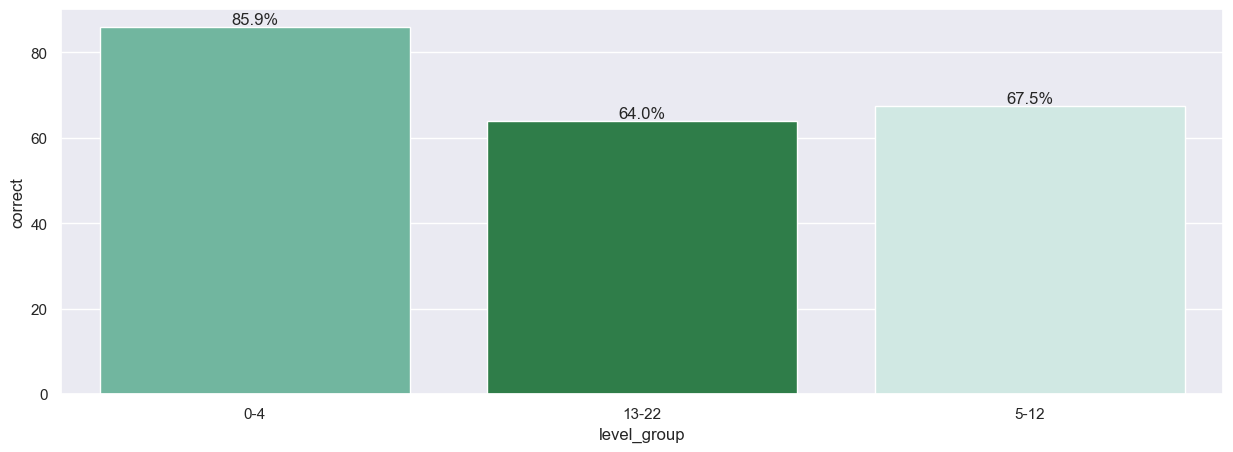

In [17]:
level_corr = responseData.groupby("level_group")["correct"].mean().mul(100).to_frame().reset_index()
pal = sb.color_palette("BuGn",len(level_corr))
rank = level_corr.sort_values("level_group")["correct"].argsort()
plt.figure(figsize=(15,5))
g = sb.barplot(data=level_corr,x="level_group",y="correct",palette=np.array(pal[::])[rank],)
g.bar_label(g.containers[0],fmt="%.1f%%")
del level_corr,pal,rank,g

## Response data - Preprocessing

The format of train_labels.csv (response data) is different from train.csv (predictor data). Thus, both csv cannot be combined simply.

With this, the it need to be reformatted:
* Split `session_id` into 2 columns - `sessionID` and `qns`
* Clean up `qns` by removing "q" in the data

In [18]:
# 1. split the "session_id" column into "sessionID" and "qns"
split_responseData = responseData['session_id'].str.split("_", expand=True)
# rename the headers
split_responseData = split_responseData.rename(columns={split_responseData.columns[0]: 'sessionID', split_responseData.columns[1]: 'qns'})
# combine the dataframe of the 2 split items and the correct column of the original dataframe
processed_responseData = pd.concat([split_responseData, responseData['correct']], axis=1)
#change datatype for 'correct' column from int64 to object (CONSIDER 'BOOL' INSTEAD)
processed_responseData['correct'] = processed_responseData['correct'].astype('object')

# 2. split the "qns" column into "q" and "question id"
split_qns = processed_responseData['qns'].str.split("q", expand=True)
split_qns = split_qns.rename(columns={split_qns.columns[0]: 'q', split_qns.columns[1]: 'qns'})
# combine the dataframe of the 'qns' into processed_responseData
processed_responseData_sortedBySessionID = pd.concat([processed_responseData['sessionID'], split_qns['qns'], processed_responseData['correct']], axis=1)
# convert the datatype of qns to integer for sorting
processed_responseData_sortedBySessionID['qns'] = processed_responseData_sortedBySessionID['qns'].astype('int')
# sort the dataset according to ascending order of the 'sessionID' and 'qns'
processed_responseData_sortedBySessionID = processed_responseData_sortedBySessionID.sort_values(['sessionID', 'qns'], ascending=[True, True])
# reset the index
processed_responseData_sortedBySessionID = processed_responseData_sortedBySessionID.reset_index(drop=True)

# 3. Have a overview of data
processed_responseData_sortedBySessionID.info()
processed_responseData_sortedBySessionID.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sessionID  212022 non-null  object
 1   qns        212022 non-null  int32 
 2   correct    212022 non-null  object
dtypes: int32(1), object(2)
memory usage: 4.0+ MB


,sessionID,qns,correct
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312431273200,4,1
4,20090312431273200,5,1
5,20090312431273200,6,1
6,20090312431273200,7,1
7,20090312431273200,8,1
8,20090312431273200,9,1
9,20090312431273200,10,1


After performing preprocessing, the following are some observations of the dataset
* There are `3` variables/features/columns
    * increased by 1 as session_id is splitted into 2 columns
* `212022` observations/samples/rows in the dataset.
* All seem to be response variables.     
* There are `1` variables identified as `int64`.
* There are `2` variables identified as `object`.

# 1.3 Combine Response & Predictor data

<b>Response Data</b>
* To predict and train model, we need to combine predictor and response data in one dataframe.
* Due to the distribution of questions in the game(players only answer questions after each of the total three sessions), we divide the data into 3 sections based on `qns` in accordance to `level_group` 
    * `0-4` : `qns` is from 1 to 3
    * `5-12` : `qns` is from 4 to 13
    * `13-22` : `qns` is from 14 to 18

<b>Predictor Data</b>
* Since the size of those two dataframes are diffeerent, we need to extract characteristic value for each of three sessions and align the processed dataframe with the response.
* Slot and divide the data according to on `level_group`
* Extract the characteristic value for each predictor column
    1. `elapsed_time` : Total Time - last `elapsed_time` value of each player
    2. `event_name` : Top - value with the most count of each player
    3. `name` : Top - value with the most count of each player
    4. `level` : Deleted - value only indicates the stage of the game
    5. `page` : Bool - value represents if player clikced(1) or did not click (0) on notebook which stores the clue collected
    6. `room_coor_x`, `room_coor_y`, `screen_coor_x` and `screen_coor_y` : Fullscreen - Evaluate if the player is in fullscreen (1) or not (0)
    7. `hover_duration` : Mean - indicates the duration in which the cursor was positioned over a particular area of a computer screen
    8. `text` : Deleted - value only indicates the game's NPCs
    9. `room_fqid` : Deleted - value only indicates the game's NPCs
    10. `text_fqid` : Deleted - value only indicates the game's NPCs
    11. `level_group` : Retained
    
<b>Append the results of the 18 questions at the end of each row for each player</b>

### Divide the response data into 3 different dataframe
* Divide the data into 3 sections based on `qns` in accordance to `level_group` 
    * `0-4` : `qns` is from 1 to 3
    * `5-12` : `qns` is from 4 to 13
    * `13-22` : `qns` is from 14 to 18

In [19]:
sub1 = processed_responseData_sortedBySessionID[processed_responseData_sortedBySessionID['qns']<4]
sub1 = sub1.sort_values(['sessionID', 'qns']).reset_index()
sub1 = sub1.drop(['index'],axis=1)

sub2 = processed_responseData_sortedBySessionID[processed_responseData_sortedBySessionID['qns']>=4]
sub2 = sub2[sub2['qns']<14]
sub2 = sub2.sort_values(['sessionID', 'qns']).reset_index()
sub2 = sub2.drop(['index'],axis=1)

sub3 = processed_responseData_sortedBySessionID[processed_responseData_sortedBySessionID['qns']>=14]
sub3 = sub3.sort_values(['sessionID', 'qns']).reset_index()
sub3 = sub3.drop(['index'],axis=1)

display(sub1, sub2, sub3)

,sessionID,qns,correct
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312433251036,1,0
4,20090312433251036,2,1
...,...,...,...
35332,22100219442786200,2,1
35333,22100219442786200,3,1
35334,22100221145014656,1,0
35335,22100221145014656,2,1


,sessionID,qns,correct
0,20090312431273200,4,1
1,20090312431273200,5,1
2,20090312431273200,6,1
3,20090312431273200,7,1
4,20090312431273200,8,1
...,...,...,...
117785,22100221145014656,9,1
117786,22100221145014656,10,0
117787,22100221145014656,11,1
117788,22100221145014656,12,1


,sessionID,qns,correct
0,20090312431273200,14,1
1,20090312431273200,15,1
2,20090312431273200,16,0
3,20090312431273200,17,1
4,20090312431273200,18,1
...,...,...,...
58890,22100221145014656,14,0
58891,22100221145014656,15,0
58892,22100221145014656,16,0
58893,22100221145014656,17,1


### Slot the predictor data
* Slot and divide the data according to on `level_group`

In [20]:
test = data.sort_values(['session_id', 'level_group'], ascending=[True, True])
test

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173446,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173447,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173448,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
13173449,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


### Extract characteristic value for each column
1. `elapsed_time` : Total Time - last `elapsed_time` value of each player
2. `event_name` : Top - value with the most count of each player
3. `name` : Top - value with the most count of each player
4. `level` : Deleted - value only indicates the stage of the game
5. `page` : Bool - value represents if player clikced(1) or did not click (0) on notebook which stores the clue collected
6. `room_coor_x`, `room_coor_y`, `screen_coor_x` and `screen_coor_y` : Fullscreen - Evaluate if the player is in fullscreen (1) or not (0)
7. `hover_duration` : Mean - indicates the duration in which the cursor was positioned over a particular area of a computer screen
8. `text` : Deleted - value only indicates the game's NPCs
9. `room_fqid` : Deleted - value only indicates the game's NPCs
10. `text_fqid` : Deleted - value only indicates the game's NPCs
11. `level_group` : Retained
    
Overall for categorical values, since we're preprocessing them into binary categorical values, we temtatively just use label encoding rather than one-hot encoding as one-hot encoding may not provide significant benefits but also creates too many columns.

#### Section 1 : `level_group` of 0-4

In [21]:
data1 = test[test['level_group'] == '0-4']
data1

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13172870,22100221145014656,206,352635,navigate_click,undefined,4,NaN,-914.204224,-50.000000,26.0,380.0,NaN,NaN,toentry,tunic.kohlcenter.halloffame,NaN,0-4
13172871,22100221145014656,207,353336,map_hover,basic,4,NaN,NaN,NaN,NaN,NaN,84.0,NaN,tunic.kohlcenter,tunic.kohlcenter.halloffame,NaN,0-4
13172872,22100221145014656,208,354020,map_click,undefined,4,NaN,-549.217712,-2.000000,449.0,332.0,NaN,NaN,tunic.capitol_0,tunic.kohlcenter.halloffame,NaN,0-4
13172873,22100221145014656,209,356238,navigate_click,undefined,4,NaN,313.584259,107.913147,463.0,226.0,NaN,NaN,chap1_finale,tunic.capitol_0.hall,NaN,0-4


In [22]:
# ===== Factor 1 : Total "elapsed_time" value of each player =====
total_elapsed_time = data1.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# ===== Factor 2 & 3: Value with the most count of each player =====
filtered_data = data1[(data1['event_name'] != 'navigate_click') & (data1['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# ===== Factor 5 : Value represents if player clikced(1) or did not click (0) on notebook=====
avg_page = data1.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# ===== Factor 6 : Evaluate if the player is in fullscreen (1) or not (0) =====

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data1.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data1['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})

# ===== Factor 7 : Mean of the all the values for each player =====
avg_hover_duration = data1.groupby(['session_id'])['hover_duration'].mean().reset_index()

# ===== Merge the variable data =====
temp_level_group = pd.DataFrame({'level_group': ['0-4'] * 11779})
part1 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part1 = pd.concat([part1]*3, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

for i in range(0,35337):
    if (i%3) == 0:
        part1.iloc[i, -1] = 1
    elif (i%3) == 1:
        part1.iloc[i, -1] = 2
    elif (i%3) == 2:
        part1.iloc[i, -1] = 3
        
part1 = part1.rename(columns={'level_group': 'qns'})
part1 = pd.concat([part1, sub1['correct']], axis = 1) #Append response variable

part1

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50000,1,1
1,20090312431273200,194860,person_click,0,1,2389.50000,2,1
2,20090312431273200,194860,person_click,0,1,2389.50000,3,1
3,20090312433251036,233752,person_click,1,1,1378.75000,1,0
4,20090312433251036,233752,person_click,1,1,1378.75000,2,1
...,...,...,...,...,...,...,...,...
35332,22100219442786200,191727,person_click,1,1,3337.50000,2,1
35333,22100219442786200,191727,person_click,1,1,3337.50000,3,1
35334,22100221145014656,435055,object_click,1,1,4164.63623,1,0
35335,22100221145014656,435055,object_click,1,1,4164.63623,2,1


#### Section 2 : `level_group` of 5-12

In [23]:
data2 = test[test['level_group'] == '5-12']
data2

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
165,20090312431273200,175,221485,navigate_click,undefined,5,NaN,280.442169,-19.705837,653.0,321.0,NaN,NaN,boss,tunic.capitol_0.hall,NaN,5-12
166,20090312431273200,176,222334,person_click,basic,5,NaN,272.983490,-19.233582,649.0,321.0,NaN,"What are you still doing here, Jolie?",boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
167,20090312431273200,177,223251,person_click,basic,5,NaN,240.848419,-228.217453,628.0,459.0,NaN,Go find your grampa and get to work!,boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
168,20090312431273200,178,223735,navigate_click,undefined,5,NaN,331.714691,-220.627228,688.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
169,20090312431273200,179,224235,navigate_click,undefined,5,NaN,404.147217,-226.491394,716.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173446,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173447,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173448,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
13173449,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


In [24]:
# ===== Factor 1 : Total "elapsed_time" value of each player =====
total_elapsed_time = data2.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# ===== Factor 2 & 3: Value with the most count of each player =====
filtered_data = data2[(data2['event_name'] != 'navigate_click') & (data2['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# ===== Factor 5 : Value represents if player clikced(1) or did not click (0) on notebook=====
avg_page = data2.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# ===== Factor 6 : Evaluate if the player is in fullscreen (1) or not (0) =====
# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data2.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data2['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})

# ===== Factor 7 : Mean of the all the values for each player =====
avg_hover_duration = data2.groupby(['session_id'])['hover_duration'].mean().reset_index()

# ===== Merge the variable data =====
temp_level_group = pd.DataFrame({'level_group': ['5-12'] * 11779})
part2 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part2 = pd.concat([part2]*10, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i in range(0,117790):
    part2.iloc[i, -1] = values[i % len(values)]
        
part2 = part2.rename(columns={'level_group': 'qns'})
part2 = pd.concat([part2, sub2['correct']], axis = 1) #Append response variable

part2

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,499235,person_click,0,1,969.333313,4,1
1,20090312431273200,499235,person_click,0,1,969.333313,5,1
2,20090312431273200,499235,person_click,0,1,969.333313,6,1
3,20090312431273200,499235,person_click,0,1,969.333313,7,1
4,20090312431273200,499235,person_click,0,1,969.333313,8,1
...,...,...,...,...,...,...,...,...
117785,22100221145014656,3668994,person_click,1,1,1901.327881,9,1
117786,22100221145014656,3668994,person_click,1,1,1901.327881,10,0
117787,22100221145014656,3668994,person_click,1,1,1901.327881,11,1
117788,22100221145014656,3668994,person_click,1,1,1901.327881,12,1


#### Section 3 : `level_group` of 13-22

In [25]:
data3 = test[test['level_group'] == '13-22']
data3

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
461,20090312431273200,512,836732,navigate_click,undefined,13,NaN,290.153564,-204.499359,651.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
462,20090312431273200,513,837245,navigate_click,undefined,13,NaN,353.805603,-210.332062,672.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
463,20090312431273200,514,837779,navigate_click,undefined,13,NaN,587.680054,-280.706238,780.0,489.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
464,20090312431273200,515,838446,navigate_click,undefined,13,NaN,751.496887,-102.153290,823.0,365.0,NaN,NaN,toentry,tunic.capitol_1.hall,NaN,13-22
465,20090312431273200,516,839629,map_hover,basic,13,NaN,NaN,NaN,NaN,NaN,67.0,NaN,tunic.drycleaner,tunic.capitol_1.hall,NaN,13-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


In [26]:
# ===== Factor 1 : Total "elapsed_time" value of each player =====
total_elapsed_time = data3.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# ===== Factor 2 & 3: Value with the most count of each player =====
filtered_data = data3[(data3['event_name'] != 'navigate_click') & (data3['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# ===== Factor 5 : Value represents if player clikced(1) or did not click (0) on notebook=====
avg_page = data3.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# ===== Factor 6 : Evaluate if the player is in fullscreen (1) or not (0) =====
# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data3.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data3['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})

# ===== Factor 7 : Mean of the all the values for each player =====
avg_hover_duration = data3.groupby(['session_id'])['hover_duration'].mean().reset_index()

# ===== Merge the variable data =====
temp_level_group = pd.DataFrame({'level_group': ['13-22'] * 11779})
part3 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part3 = pd.concat([part3]*5, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [14, 15, 16, 17, 18]
for i in range(0,58895):
    part3.iloc[i, -1] = values[i % len(values)]
        
part3 = part3.rename(columns={'level_group': 'qns'})
part3 = pd.concat([part3, sub3['correct']], axis = 1) #Append response variable

part3

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,1272679,person_click,0,1,899.925903,14,1
1,20090312431273200,1272679,person_click,0,1,899.925903,15,1
2,20090312431273200,1272679,person_click,0,1,899.925903,16,0
3,20090312431273200,1272679,person_click,0,1,899.925903,17,1
4,20090312431273200,1272679,person_click,0,1,899.925903,18,1
...,...,...,...,...,...,...,...,...
58890,22100221145014656,5487952,person_click,1,1,669.000000,14,0
58891,22100221145014656,5487952,person_click,1,1,669.000000,15,0
58892,22100221145014656,5487952,person_click,1,1,669.000000,16,0
58893,22100221145014656,5487952,person_click,1,1,669.000000,17,1


### Combine the 3 sections

In [27]:
new_data = pd.concat([part1, part2, part3], axis = 0)
new_data

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50,1,1
1,20090312431273200,194860,person_click,0,1,2389.50,2,1
2,20090312431273200,194860,person_click,0,1,2389.50,3,1
3,20090312433251036,233752,person_click,1,1,1378.75,1,0
4,20090312433251036,233752,person_click,1,1,1378.75,2,1
...,...,...,...,...,...,...,...,...
58890,22100221145014656,5487952,person_click,1,1,669.00,14,0
58891,22100221145014656,5487952,person_click,1,1,669.00,15,0
58892,22100221145014656,5487952,person_click,1,1,669.00,16,0
58893,22100221145014656,5487952,person_click,1,1,669.00,17,1


In [28]:
# sort the combined data
new_data = new_data.sort_values(['session_id', 'qns'], ascending=[True, True]).reset_index().drop(['index'], axis=1)
new_data.info()
new_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   session_id       212022 non-null  category
 1   elapsed_time     212022 non-null  uint32  
 2   event_name       212022 non-null  object  
 3   avg_page         212022 non-null  int32   
 4   fullscreen_flag  212022 non-null  int32   
 5   hover_duration   195210 non-null  float32 
 6   qns              212022 non-null  object  
 7   correct          212022 non-null  object  
dtypes: category(1), float32(1), int32(2), object(3), uint32(1)
memory usage: 8.8+ MB


,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.500000,1,1
1,20090312431273200,194860,person_click,0,1,2389.500000,2,1
2,20090312431273200,194860,person_click,0,1,2389.500000,3,1
3,20090312431273200,499235,person_click,0,1,969.333313,4,1
4,20090312431273200,499235,person_click,0,1,969.333313,5,1
...,...,...,...,...,...,...,...,...
212017,22100221145014656,5487952,person_click,1,1,669.000000,14,0
212018,22100221145014656,5487952,person_click,1,1,669.000000,15,0
212019,22100221145014656,5487952,person_click,1,1,669.000000,16,0
212020,22100221145014656,5487952,person_click,1,1,669.000000,17,1


After combining the predictor and response data, the following are some observations of the dataset
* There are `8` variables/features/columns
* There are `212022` observations/samples/rows in the dataset.
    * 18 questions * 11779 player
* There are `2` variables identified as `int32`.
* There are `1` variables identified as `uint32`.
* There are `3` variables identified as `object`.
* There are `1` variables identified as `category`.
* There are `1` variables identified as `float32`.

# 2. EDA - new_data (After preprocessing)

In [29]:
new_data.describe(include='all')

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
count,2.120220e+05,2.120220e+05,212022,212022.000000,212022.000000,1.952100e+05,212022.0,212022.0
unique,1.177900e+04,NaN,8,NaN,NaN,NaN,18.0,2.0
top,2.009031e+16,NaN,person_click,NaN,NaN,NaN,1.0,1.0
freq,1.800000e+01,NaN,198289,NaN,NaN,NaN,11779.0,149252.0
mean,NaN,3.986148e+06,NaN,0.703988,0.943105,3.947703e+03,NaN,NaN
std,NaN,2.976629e+07,NaN,0.456497,0.231642,9.441657e+04,NaN,NaN
min,NaN,2.270000e+02,NaN,0.000000,0.000000,6.700000e+01,NaN,NaN
25%,NaN,5.743260e+05,NaN,0.000000,1.000000,1.070743e+03,NaN,NaN
50%,NaN,9.421520e+05,NaN,1.000000,1.000000,1.455460e+03,NaN,NaN
75%,NaN,1.689321e+06,NaN,1.000000,1.000000,2.023636e+03,NaN,NaN


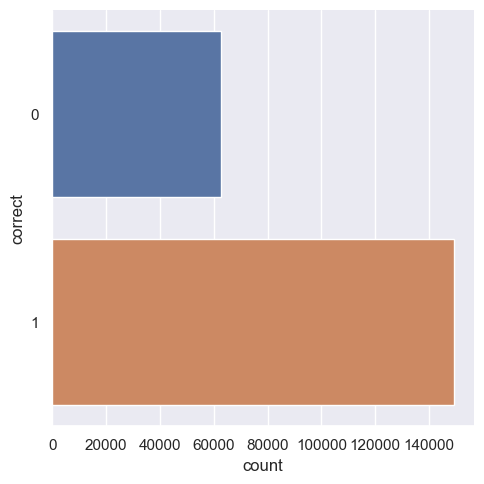

In [30]:
sb.catplot(y = 'correct', data = new_data, kind = "count")
plt.show()

In [31]:
count1, count0 = new_data['correct'].value_counts()
print("Ratio of result is Correct : Wrong = ", count1, ":", count0)

Ratio of result is Correct : Wrong =  149252 : 62770


From the ratio, there is large imbalance in the response variable.<br>
This will need to be addressed for classification models to prevent biased towards the majority class, causing bad classification of the minority class.

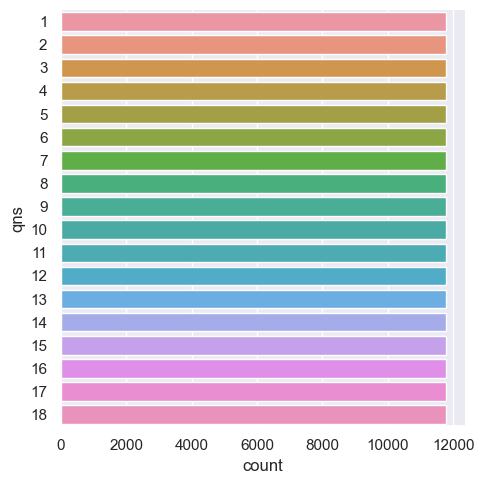

In [32]:
sb.catplot(y = 'qns', data = new_data, kind = "count")
plt.show()

From the above categorical plot, it shows that every question have same number of attempt

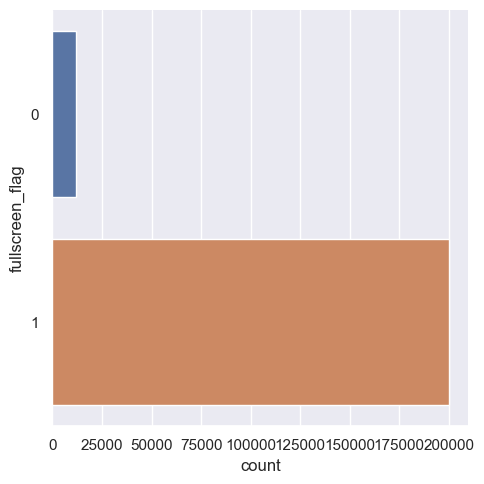

In [33]:
sb.catplot(y = 'fullscreen_flag', data = new_data, kind = "count")
plt.show()

In [34]:
count1, count0 = new_data['fullscreen_flag'].value_counts()
print("Ratio of fullscreen is isFullscreen : notFullscreen = ", count1, ":", count0)

Ratio of fullscreen is isFullscreen : notFullscreen =  199959 : 12063


From the above categorical plot and ratio, it shows that a larger portion of the player is in fullscreen with over 90%.

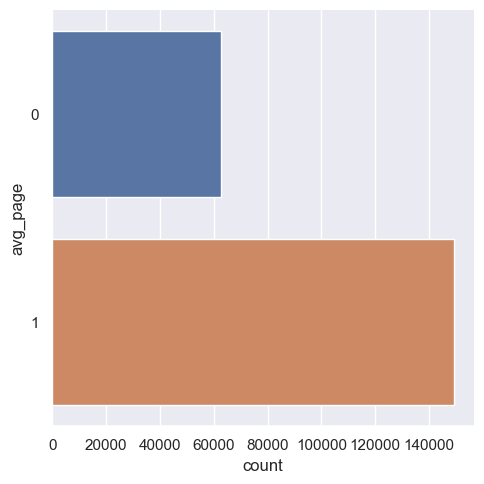

In [35]:
sb.catplot(y = 'avg_page', data = new_data, kind = "count")
plt.show()

In [36]:
count1, count0 = new_data['avg_page'].value_counts()
print("Ratio of avg_page is open1 : open0 = ", count1, ":", count0)

Ratio of avg_page is open1 : open0 =  149261 : 62761


This shows that more questions were answered with / after opening the notebook

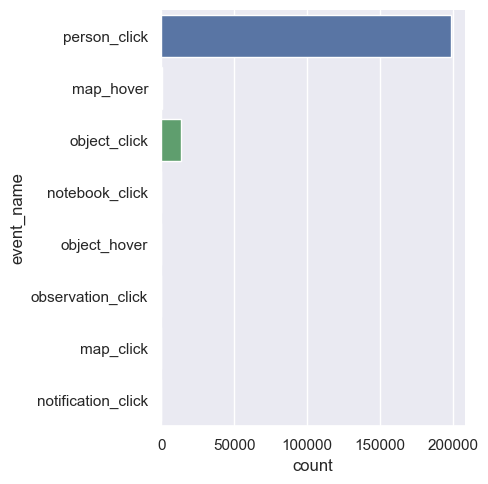

In [37]:
sb.catplot(y = 'event_name', data = new_data, kind = "count")
plt.show()

`person_click` has the most count, followed by `object_click` while the other values were insignificant

                 elapsed_time  avg_page  fullscreen_flag  hover_duration  \
elapsed_time         1.000000  0.022608         0.014013        0.058128   
avg_page             0.022608  1.000000         0.057146        0.000442   
fullscreen_flag      0.014013  0.057146         1.000000        0.002510   
hover_duration       0.058128  0.000442         0.002510        1.000000   
correct             -0.010606 -0.058021        -0.023964        0.006233   

                  correct  
elapsed_time    -0.010606  
avg_page        -0.058021  
fullscreen_flag -0.023964  
hover_duration   0.006233  
correct          1.000000  


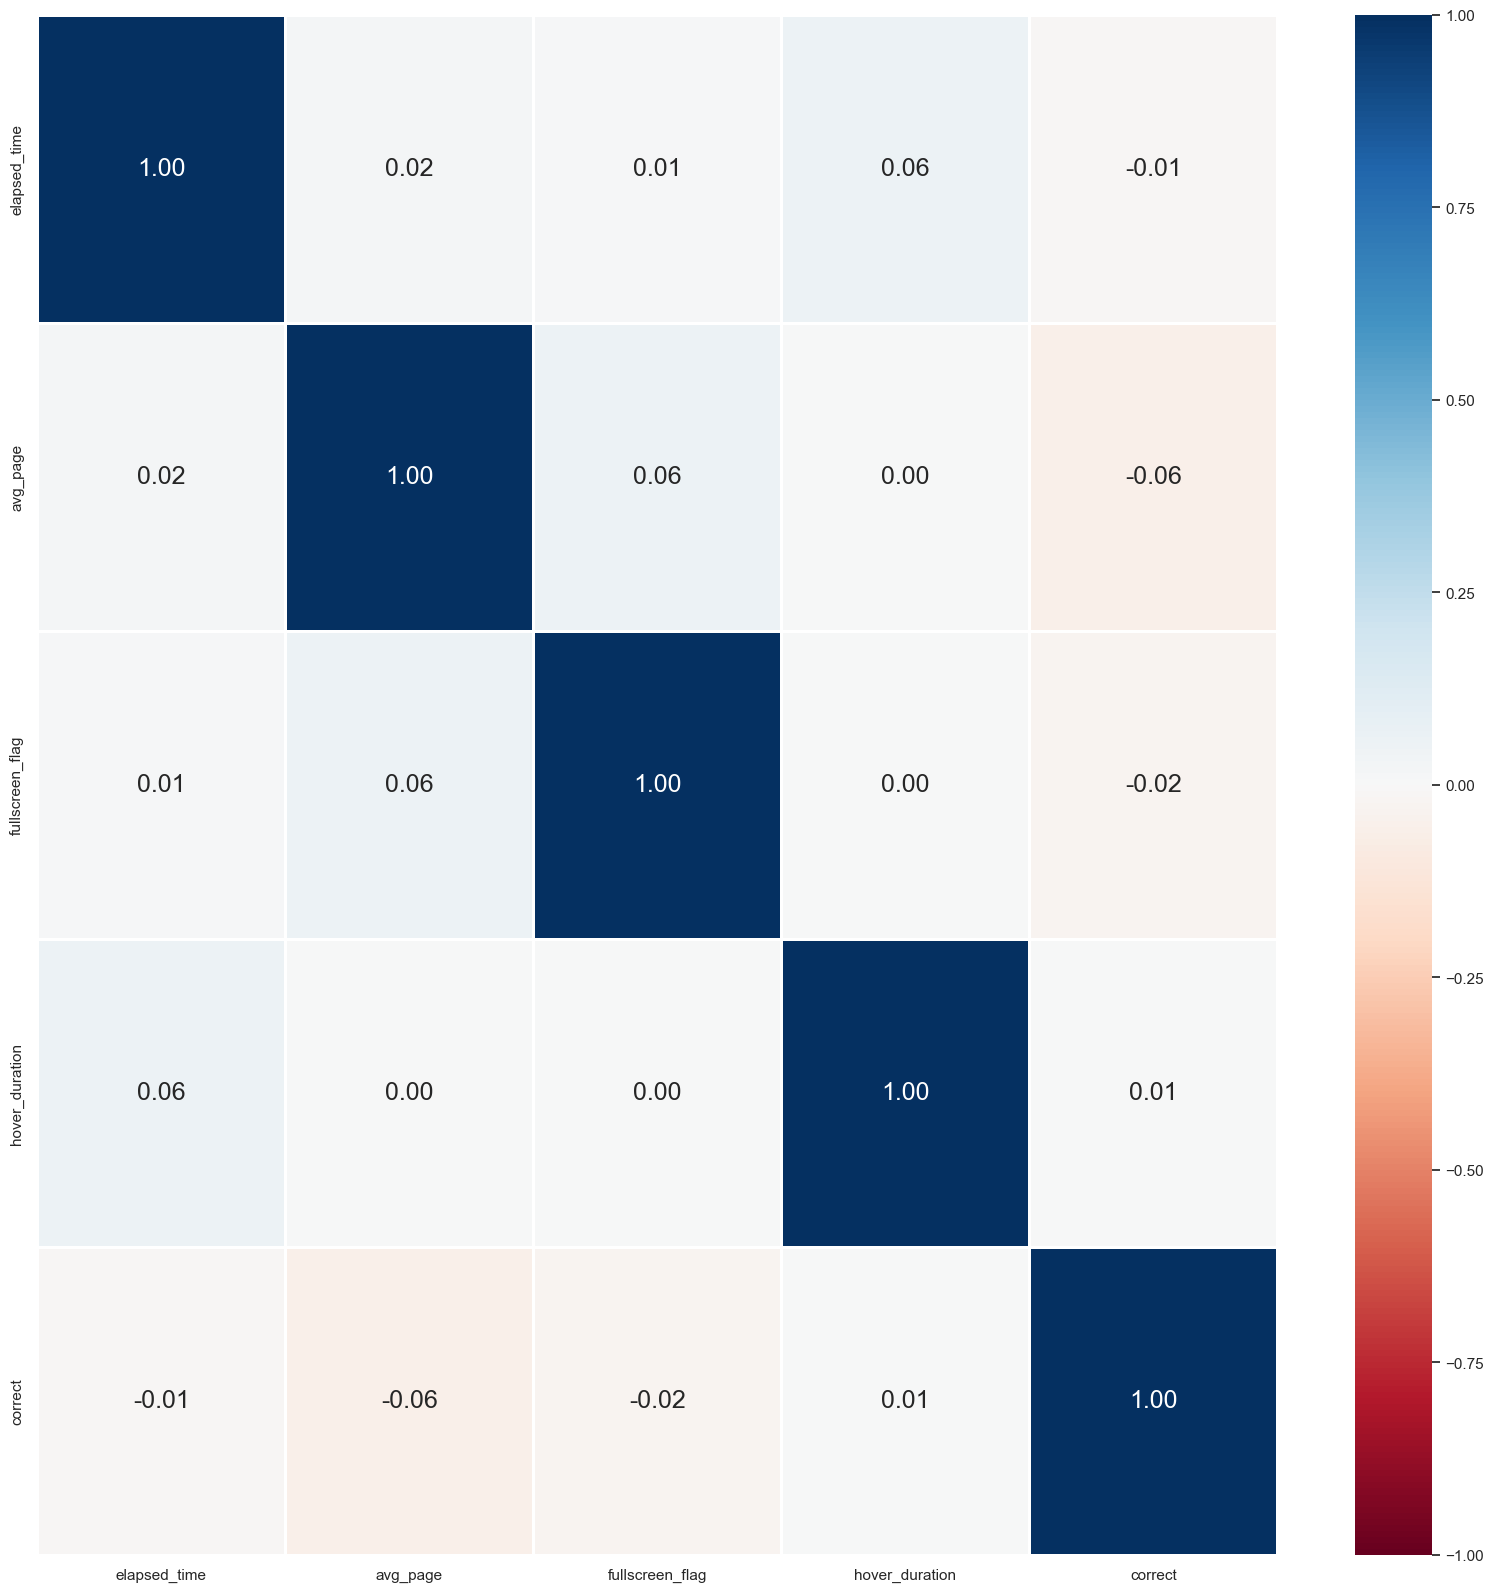

In [38]:
new_data['correct'] = new_data['correct'].astype(np.int64)

print(new_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(new_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show()

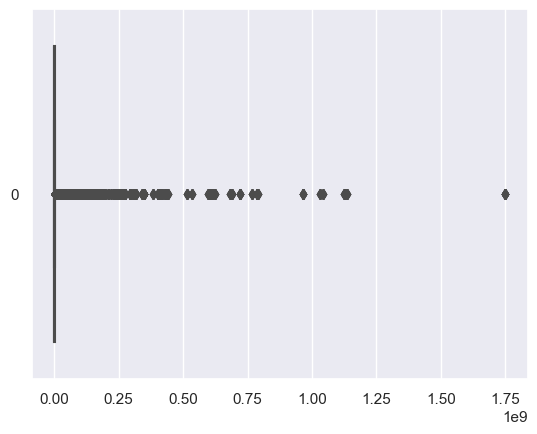

In [39]:
sb.boxplot(data = new_data['elapsed_time'], orient = "h")
plt.show()

In [40]:
#calculate the number of outliers
def countOutlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outliners = df[((df < q1-1.5*iqr) | (df > q3 + 1.5*iqr))]
    return len(outliners)

In [41]:
print("elapsed_time has", countOutlier(new_data['elapsed_time']), "outliers.")

elapsed_time has 17614 outliers.


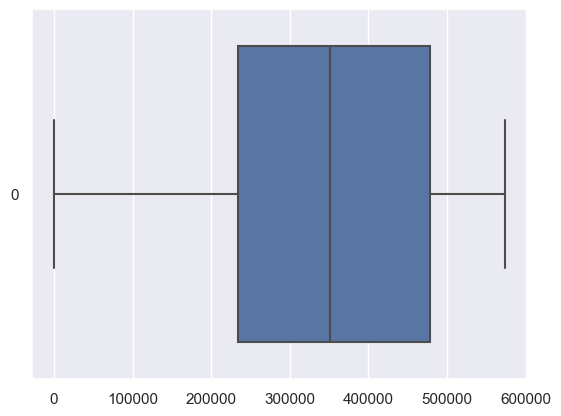

In [42]:
removedOutlier = new_data[(new_data['elapsed_time'] < new_data['elapsed_time'].quantile(0.25)) & (new_data['elapsed_time'] < new_data['elapsed_time'].quantile(0.75))]

sb.boxplot(data = removedOutlier['elapsed_time'], orient = "h")
plt.show()

In [43]:
print("elapsed_time has", countOutlier(removedOutlier['elapsed_time']), "outliers.")

elapsed_time has 0 outliers.


In [44]:
removedOutlier.describe(include="all")

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
count,5.299700e+04,52997.000000,52997,52997.000000,52997.000000,47401.000000,52997.0,52997.000000
unique,1.083000e+04,NaN,6,NaN,NaN,NaN,18.0,NaN
top,2.109051e+16,NaN,person_click,NaN,NaN,NaN,1.0,NaN
freq,1.800000e+01,NaN,47569,NaN,NaN,NaN,10804.0,NaN
mean,NaN,353561.314640,NaN,0.560352,0.906485,2264.347656,NaN,0.805970
std,NaN,136094.377687,NaN,0.496349,0.291155,2120.984375,NaN,0.395456
min,NaN,227.000000,NaN,0.000000,0.000000,67.000000,NaN,0.000000
25%,NaN,233613.000000,NaN,0.000000,1.000000,1160.666626,NaN,1.000000
50%,NaN,350697.000000,NaN,1.000000,1.000000,1686.000000,NaN,1.000000
75%,NaN,477664.000000,NaN,1.000000,1.000000,2733.800049,NaN,1.000000


                 elapsed_time  avg_page  fullscreen_flag  hover_duration  \
elapsed_time         1.000000  0.120690        -0.029199       -0.089121   
avg_page             0.120690  1.000000         0.024170        0.055362   
fullscreen_flag     -0.029199  0.024170         1.000000        0.014789   
hover_duration      -0.089121  0.055362         0.014789        1.000000   
correct             -0.212182 -0.044788        -0.004525        0.098595   

                  correct  
elapsed_time    -0.212182  
avg_page        -0.044788  
fullscreen_flag -0.004525  
hover_duration   0.098595  
correct          1.000000  


C:\Users\haosh\AppData\Local\Temp\ipykernel_13944\150542068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removedOutlier['correct'] = removedOutlier['correct'].astype(np.int64)


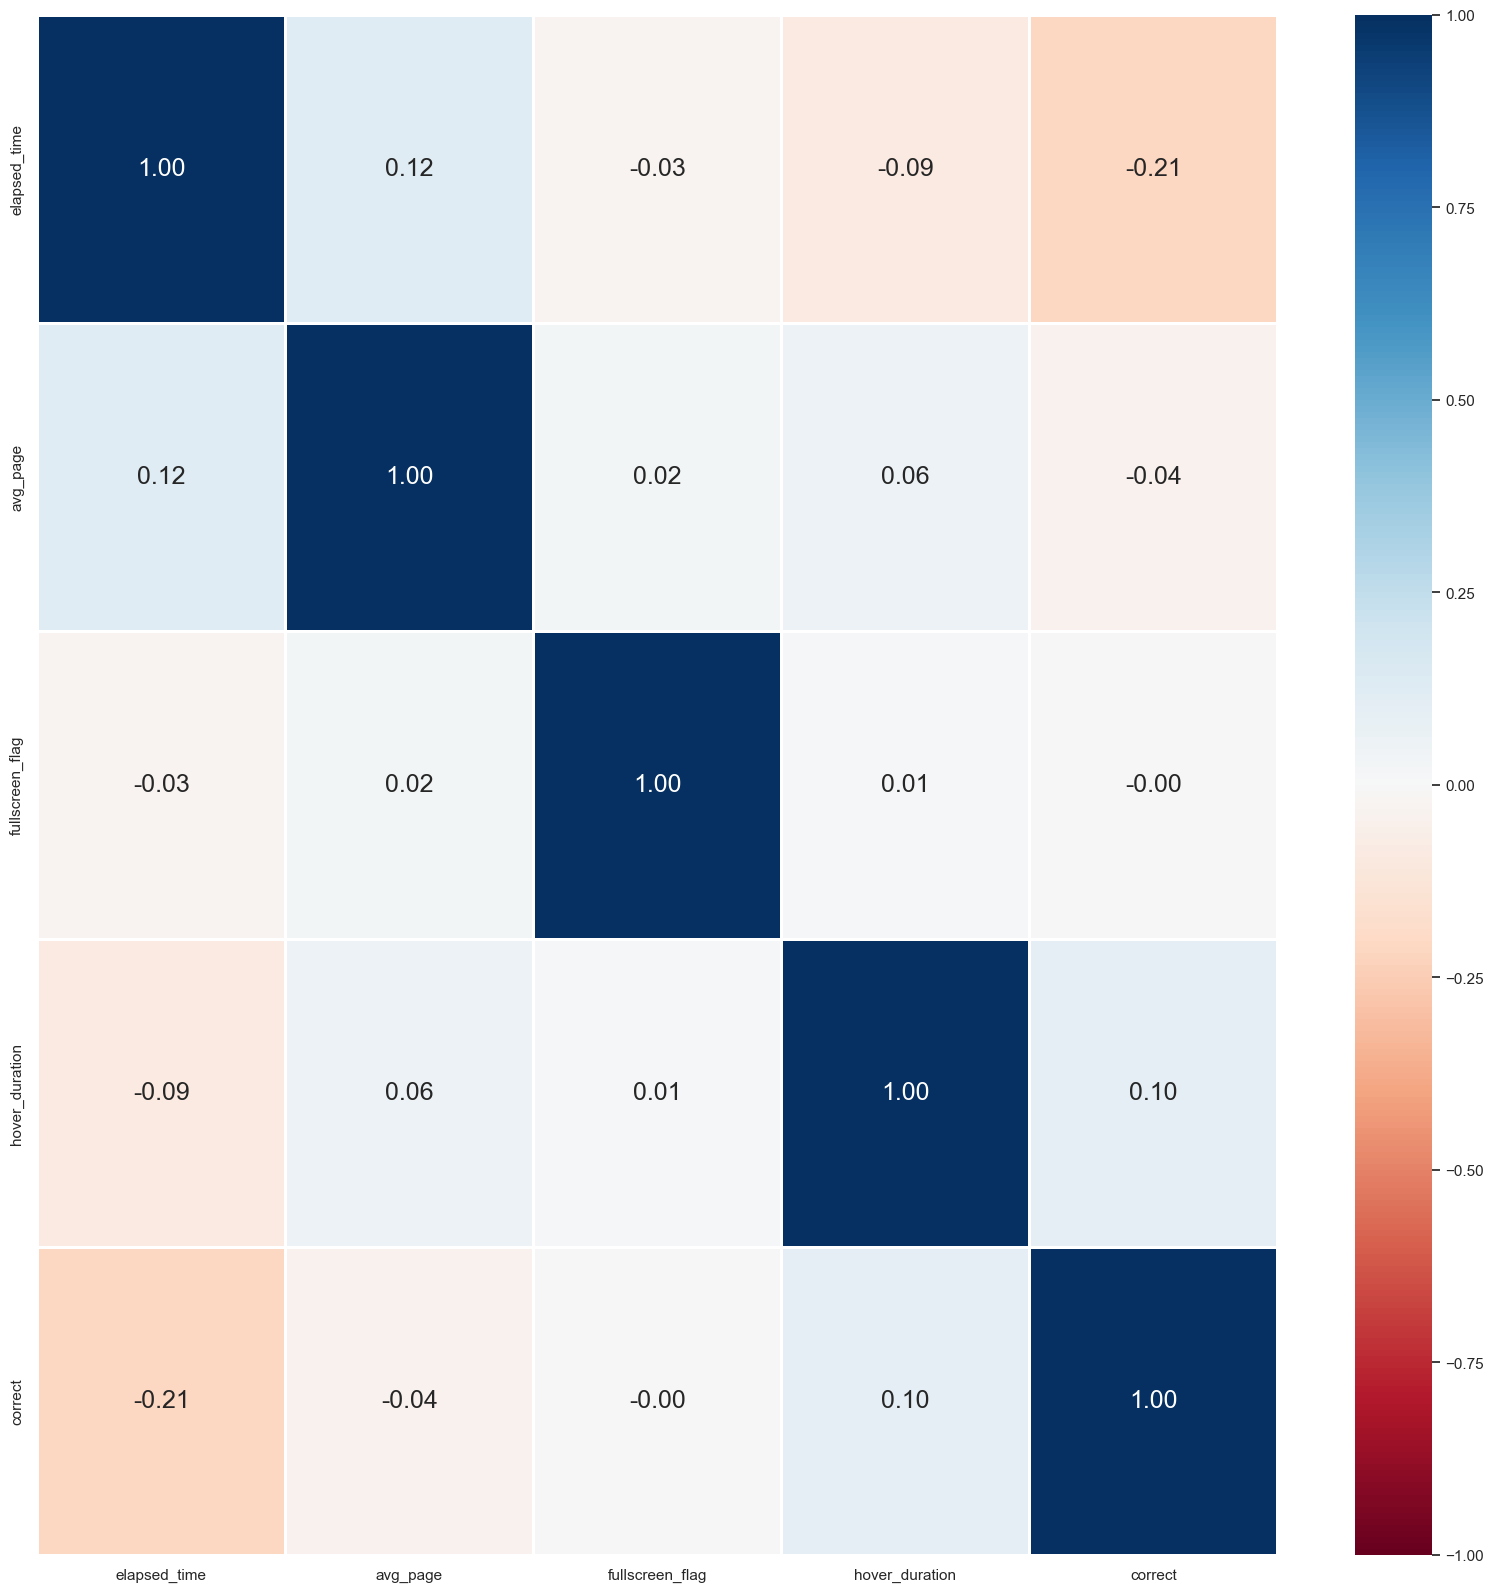

In [45]:
removedOutlier['correct'] = removedOutlier['correct'].astype(np.int64)
print(removedOutlier.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(removedOutlier.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show()

### Relationship with `correct`

#### correct vs avg_page

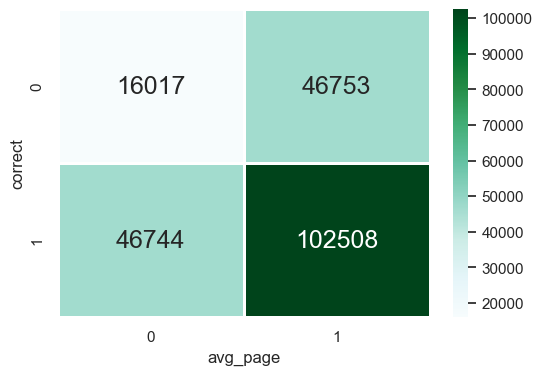

In [46]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(new_data.groupby(['correct', 'avg_page']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

From the above heatmap, it shows that notebook was opened to assist in answering the questions, regardless if it is correctly answer or not.

#### correct vs fullscreen_flag

<AxesSubplot:xlabel='fullscreen_flag', ylabel='correct'>

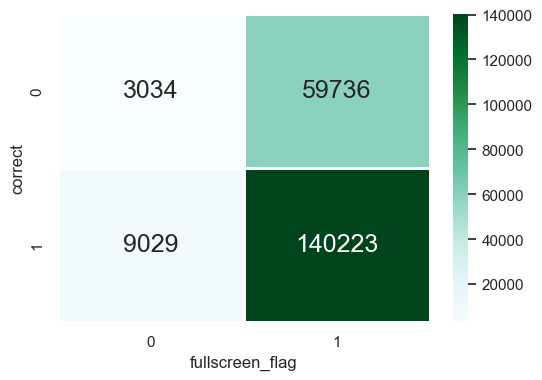

In [47]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(new_data.groupby(['correct', 'fullscreen_flag']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

From the above heatmap, the following are the observations:
* Majority of the players are in fullscreen mode.
* More questions are correctly answered in fullscreen mode.

#### correct vs event_name

<AxesSubplot:xlabel='event_name', ylabel='correct'>

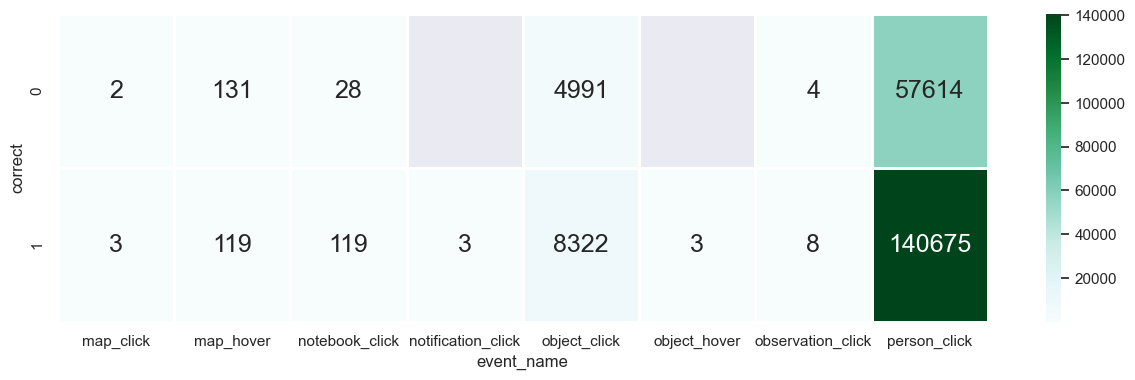

In [48]:
f = plt.figure(figsize=(15, 4))
sb.heatmap(new_data.groupby(['correct', 'event_name']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

From the above heatmap, players click on `person_click` most frequently, followed by `onject_click` in attempt to answer the questions. These 2 `event_name` were also most used to correctly answer the questions.

# 3. Model

### Before we go to model however, we create alternative dataframe here using one-hot encoding to fit in models like decision tree.

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


# OneHotEncoding of categorical predictors (not the response)
new_data_cat = new_data[['event_name']]
ohe.fit(new_data_cat)
new_data_cat_ohe = pd.DataFrame(ohe.transform(new_data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(new_data_cat.columns))

# Check the encoded variables
new_data_cat_ohe.info()
new_data_cat_ohe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   event_name_map_click           212022 non-null  float64
 1   event_name_map_hover           212022 non-null  float64
 2   event_name_notebook_click      212022 non-null  float64
 3   event_name_notification_click  212022 non-null  float64
 4   event_name_object_click        212022 non-null  float64
 5   event_name_object_hover        212022 non-null  float64
 6   event_name_observation_click   212022 non-null  float64
 7   event_name_person_click        212022 non-null  float64
dtypes: float64(8)
memory usage: 12.9 MB


,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
212017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# Combine with original data
new_data_num = new_data[['session_id','elapsed_time','avg_page','fullscreen_flag','hover_duration','qns']]
new_data_res = new_data['correct']
ohe_data = pd.concat([new_data_num, new_data_cat_ohe, new_data_res], 
                           sort = False, axis = 1).reindex(index=new_data_num.index)

# Check the final dataframe
ohe_data.info()
ohe_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   session_id                     212022 non-null  category
 1   elapsed_time                   212022 non-null  uint32  
 2   avg_page                       212022 non-null  int32   
 3   fullscreen_flag                212022 non-null  int32   
 4   hover_duration                 195210 non-null  float32 
 5   qns                            212022 non-null  object  
 6   event_name_map_click           212022 non-null  float64 
 7   event_name_map_hover           212022 non-null  float64 
 8   event_name_notebook_click      212022 non-null  float64 
 9   event_name_notification_click  212022 non-null  float64 
 10  event_name_object_click        212022 non-null  float64 
 11  event_name_object_hover        212022 non-null  float64 
 12  event_name_obser

,session_id,elapsed_time,avg_page,fullscreen_flag,hover_duration,qns,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click,correct
0,20090312431273200,194860,0,1,2389.500000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,20090312431273200,194860,0,1,2389.500000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,20090312431273200,194860,0,1,2389.500000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,20090312431273200,499235,0,1,969.333313,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,20090312431273200,499235,0,1,969.333313,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212017,22100221145014656,5487952,1,1,669.000000,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212018,22100221145014656,5487952,1,1,669.000000,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212019,22100221145014656,5487952,1,1,669.000000,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212020,22100221145014656,5487952,1,1,669.000000,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


There’re two constraints that influence our model selection:
* this is a standard binary classification problem
* our dataset is huge.

There’re 6 normal models for binary classification problem: 

* Decision Tree
* Random Forest
* XGBoost
* Logistic Regression
* Support Vector Machines
* Neural Network

From EDA, we can see this is apparently not linear relationship between student’s answer and predictors, so we abandon `Logistic Regression`. 

Also since `SVM` and `Neural Network` is computationally expensive and our dataset is huge. So we only try `Decision Tree` and two variations of decision tree, `Random forest` and `XGboost`.

For the baseline, As it’s a binary classificaiont problem, probability to choose between correct and wrong will be `0.5`. 

The current peak accuracy on `Kaggle LEADERBOARD` of this competition is `0.75`, 0.70, …

So our goal is to try our best to approach `0.7` for our final test data inference.


We'll be using standard `confusion matrix` as `performance matrix` for our models:

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

## 3.1 Decision Tree Model

As we learn from lecture, `decision tree model` recursively splits the data into smaller subsets based on the values of the input features, until the subsets contain only data points of the same class or have reached a certain threshold.



In [51]:
print(ohe_data['correct'].dtypes) 

int64


D:\UsefulSoftware\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0.5, 0.9, 'qns <= 4.5\ngini = 0.417\nsamples = 148415\nvalue = [43902, 104513]\nclass = Good'),
 Text(0.25, 0.7, 'qns <= 1.5\ngini = 0.242\nsamples = 32997\nvalue = [4645, 28352]\nclass = Good'),
 Text(0.125, 0.5, 'event_name_person_click <= 0.5\ngini = 0.398\nsamples = 8225\nvalue = [2252, 5973]\nclass = Good'),
 Text(0.0625, 0.3, 'elapsed_time <= 307180.0\ngini = 0.478\nsamples = 1408\nvalue = [557, 851]\nclass = Good'),
 Text(0.03125, 0.1, 'gini = 0.439\nsamples = 525\nvalue = [171, 354]\nclass = Good'),
 Text(0.09375, 0.1, 'gini = 0.492\nsamples = 883\nvalue = [386, 497]\nclass = Good'),
 Text(0.1875, 0.3, 'elapsed_time <= 299364.0\ngini = 0.374\nsamples = 6817\nvalue = [1695, 5122]\nclass = Good'),
 Text(0.15625, 0.1, 'gini = 0.339\nsamples = 4350\nvalue = [941, 3409]\nclass = Good'),
 Text(0.21875, 0.1, 'gini = 0.424\nsamples = 2467\nvalue = [754, 1713]\nclass = Good'),
 Text(0.375, 0.5, 'qns <= 3.5\ngini = 0.175\nsamples = 24772\nvalue = [2393, 22379]\nclass = Good'),
 Tex

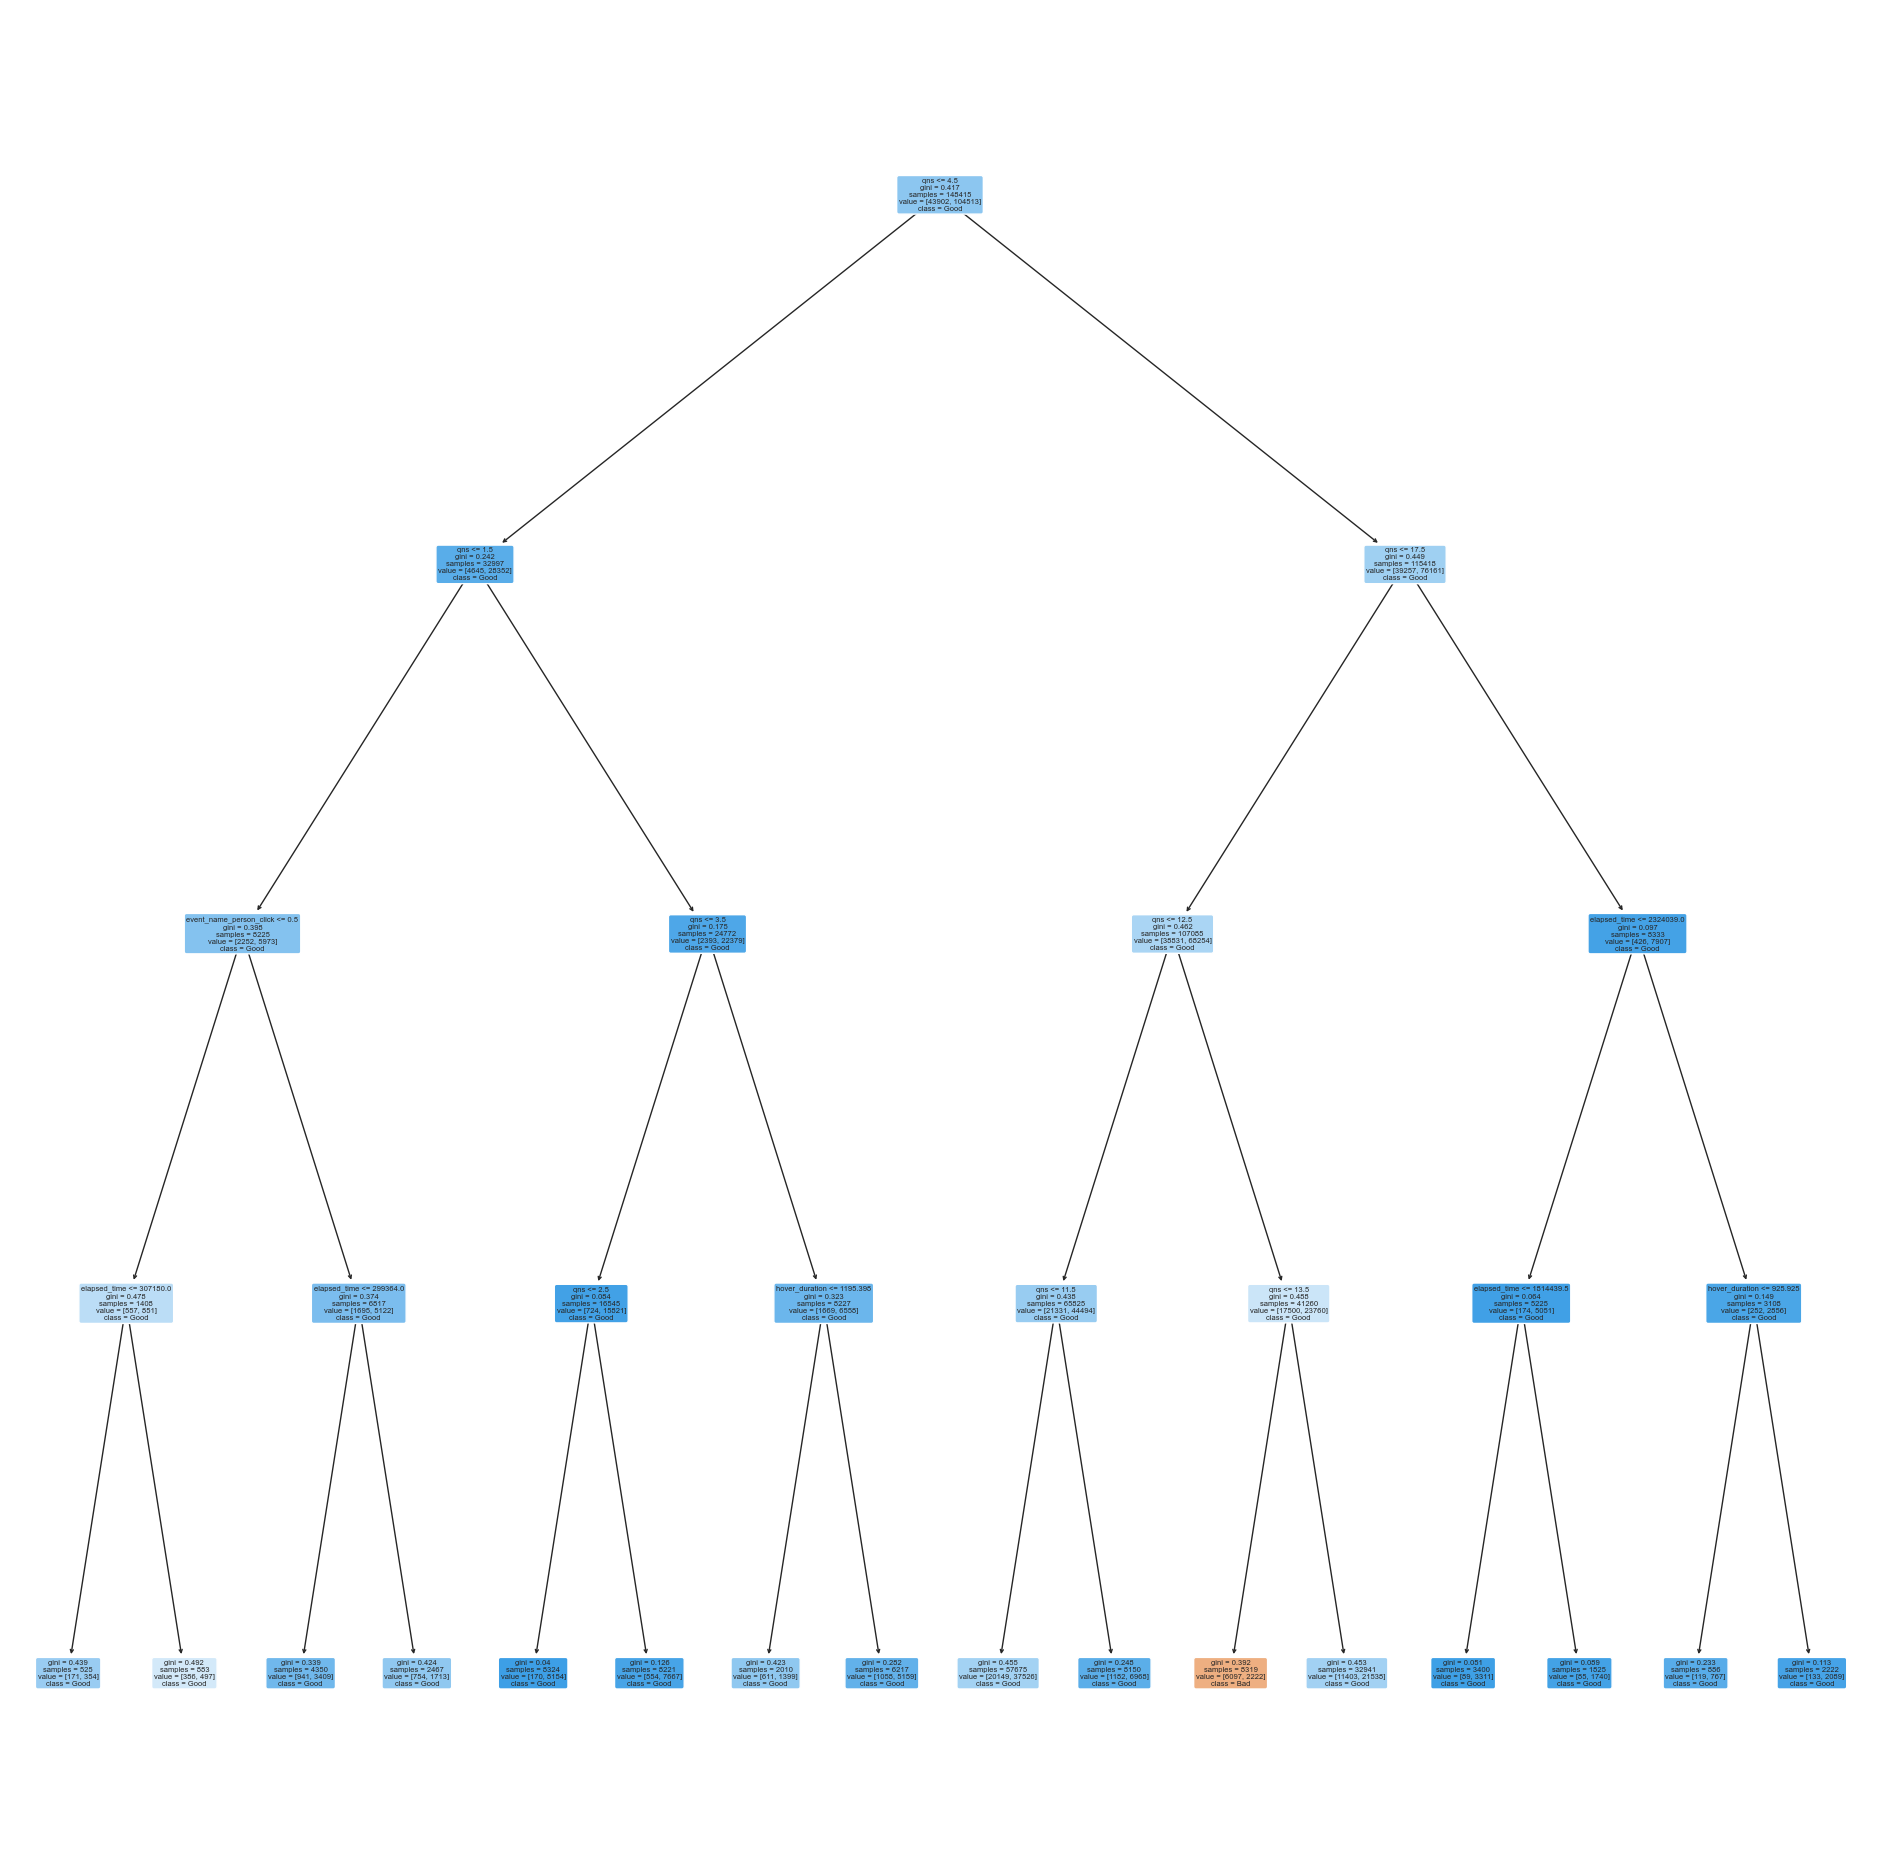

In [52]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Extract Response and Predictors

y = pd.DataFrame(ohe_data['correct'])

# We using labe_lencoder to solve y data type issues.
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the target variable
y = le.fit_transform(y)

## Here We also drop session_id as it's not related to model
# X = pd.DataFrame(new_data.drop('correct', axis = 1))
X = ohe_data.drop(columns=['correct', 'session_id'])
## While running we encountered "NaN" value warning, it turned out in value 'hover_duration' there's MISSING data points. We replace NaN with mean value of all hover_time.
X = X.fillna(X.mean())

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])

Train Data
Accuracy  :	 0.730303540747229

TPR Train :	 0.9787394869537761
TNR Train :	 0.13887749988610998

FPR Train :	 0.86112250011389
FNR Train :	 0.021260513046223915


<AxesSubplot:>

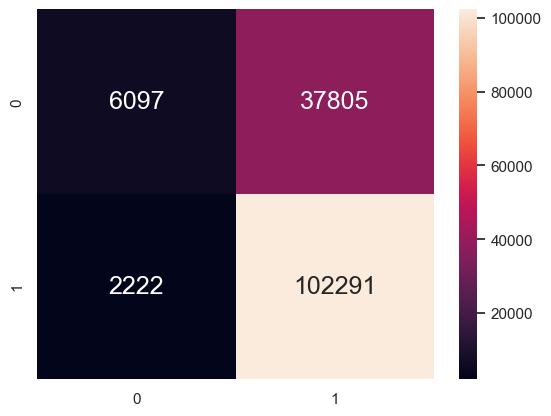

In [53]:
import seaborn as sb
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7274513811372962

TPR Test :	 0.9784528040412168
TNR Test :	 0.1322874708501166

FPR Test :	 0.8677125291498834
FNR Test :	 0.021547195958783166


<AxesSubplot:>

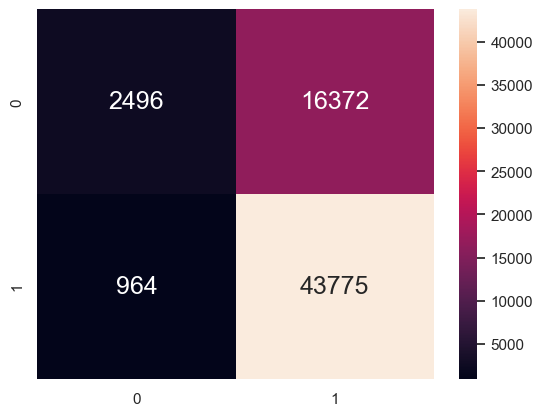

In [54]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

As expected, `False Positives` are much higher in number than `False Negatives` in both Train and Test data. Thus,
We `upsample` the data and rerun the decision tree.

## 3.2 Binary Decision Tree (with balanced classes)

### Preprocessing 

In [55]:
# Upsample Bad to match Good
from sklearn.utils import resample

answerWrong = ohe_data[ohe_data.correct == 0]
answerCorrect = ohe_data[ohe_data.correct == 1]
 
# Upsample the Bad samples
answerWrong_up = resample(answerWrong, 
                        replace=True,                     # sample with replacement
                        n_samples=answerCorrect.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
ohe_data_up = pd.concat([answerWrong_up, answerCorrect])
 
# Check the ratio of the classes
ohe_data_up['correct'].value_counts()

0    149252
1    149252
Name: correct, dtype: int64

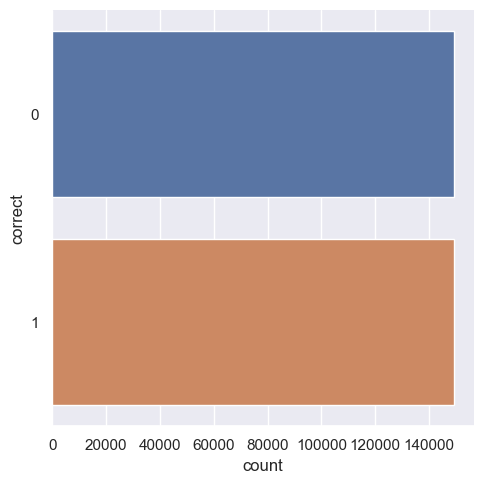

In [56]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'correct', data = ohe_data_up, kind = "count")

In [57]:
# Confirm that the OHE is still in place
# and that the samples have now increased
ohe_data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298504 entries, 132802 to 212021
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   session_id                     298504 non-null  category
 1   elapsed_time                   298504 non-null  uint32  
 2   avg_page                       298504 non-null  int32   
 3   fullscreen_flag                298504 non-null  int32   
 4   hover_duration                 274278 non-null  float32 
 5   qns                            298504 non-null  object  
 6   event_name_map_click           298504 non-null  float64 
 7   event_name_map_hover           298504 non-null  float64 
 8   event_name_notebook_click      298504 non-null  float64 
 9   event_name_notification_click  298504 non-null  float64 
 10  event_name_object_click        298504 non-null  float64 
 11  event_name_object_hover        298504 non-null  float64 
 12  event_name_

### Fit in model

D:\UsefulSoftware\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0.5, 0.9, 'qns <= 4.5\ngini = 0.5\nsamples = 208952\nvalue = [104531, 104421]\nclass = Bad'),
 Text(0.25, 0.7, 'qns <= 1.5\ngini = 0.405\nsamples = 39435\nvalue = [11115, 28320]\nclass = Good'),
 Text(0.125, 0.5, 'event_name_person_click <= 0.5\ngini = 0.499\nsamples = 11410\nvalue = [5480, 5930]\nclass = Good'),
 Text(0.0625, 0.3, 'elapsed_time <= 306013.0\ngini = 0.462\nsamples = 2225\nvalue = [1418, 807]\nclass = Bad'),
 Text(0.03125, 0.1, 'gini = 0.491\nsamples = 754\nvalue = [428, 326]\nclass = Bad'),
 Text(0.09375, 0.1, 'gini = 0.44\nsamples = 1471\nvalue = [990, 481]\nclass = Bad'),
 Text(0.1875, 0.3, 'elapsed_time <= 282732.0\ngini = 0.493\nsamples = 9185\nvalue = [4062, 5123]\nclass = Good'),
 Text(0.15625, 0.1, 'gini = 0.474\nsamples = 5169\nvalue = [1994, 3175]\nclass = Good'),
 Text(0.21875, 0.1, 'gini = 0.5\nsamples = 4016\nvalue = [2068, 1948]\nclass = Bad'),
 Text(0.375, 0.5, 'qns <= 3.5\ngini = 0.321\nsamples = 28025\nvalue = [5635, 22390]\nclass = Good'),
 Text(0

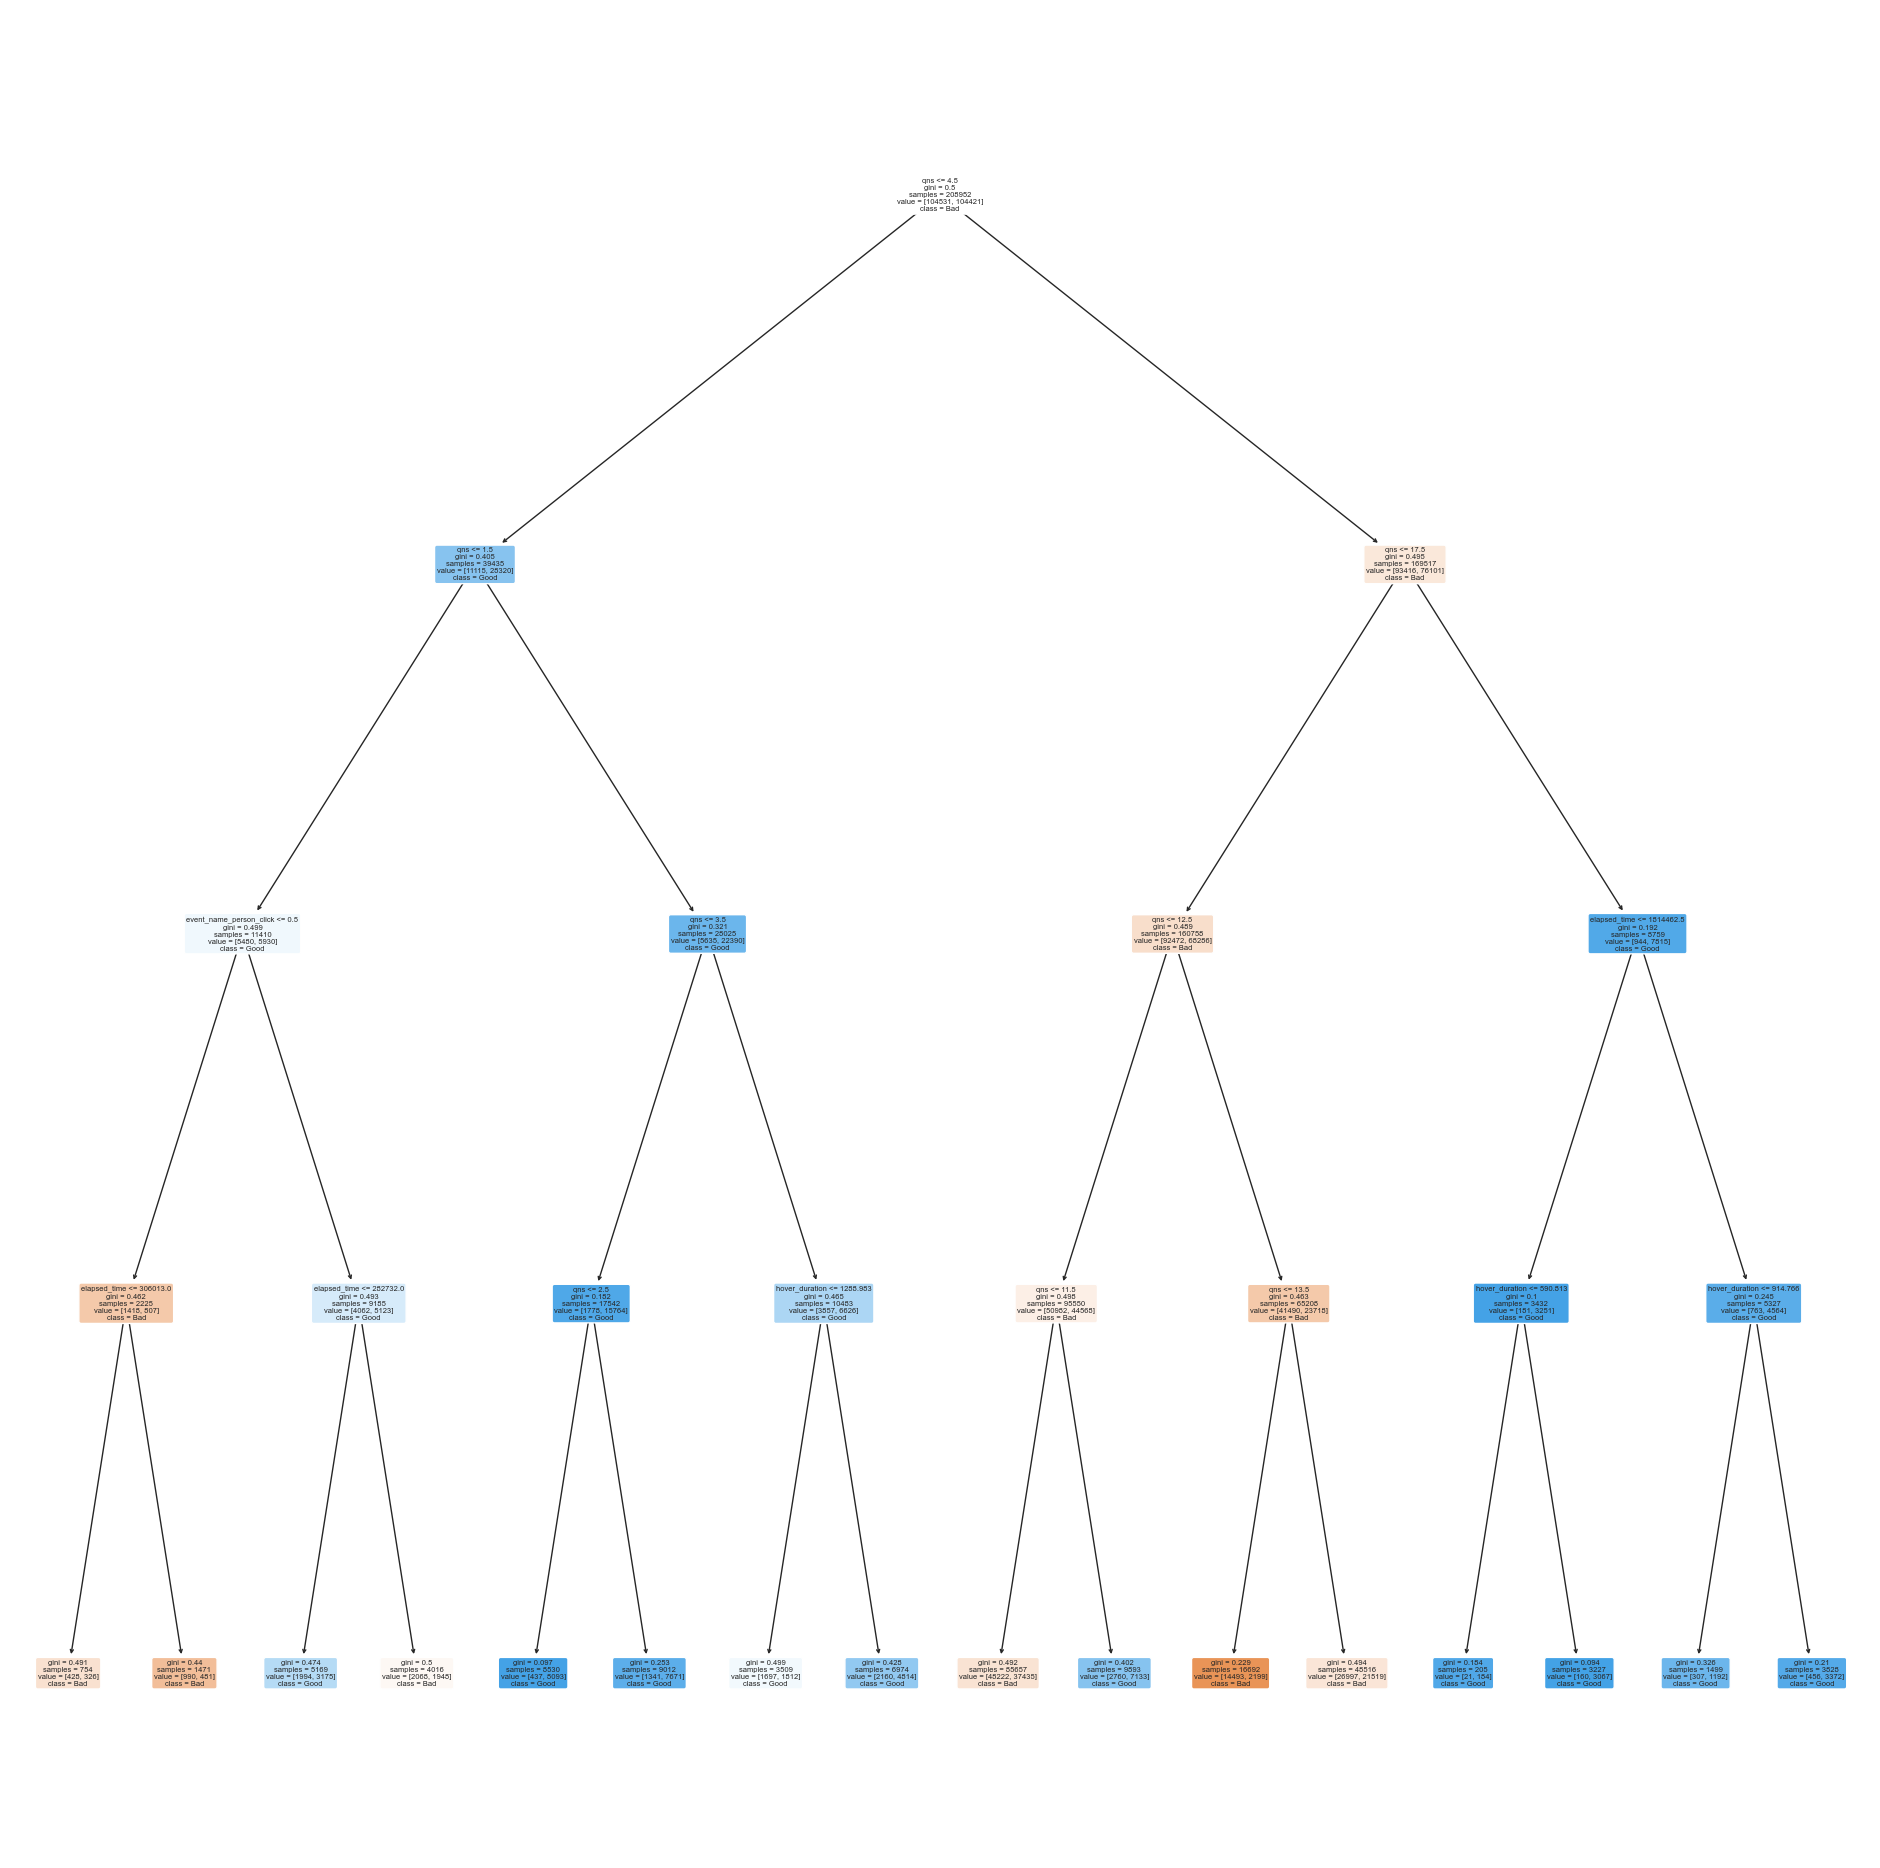

In [58]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Extract Response and Predictors

y = pd.DataFrame(ohe_data_up['correct'])

# We using labe_lencoder to solve y data type issues.
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the target variable
y = le.fit_transform(y)

## Here We also drop session_id as it's not related to model
# X = pd.DataFrame(new_data.drop('correct', axis = 1))
X = ohe_data_up.drop(columns=['correct', 'session_id'])
## While running we encountered "NaN" value warning, it turned out in value 'hover_duration' there's MISSING data points. We replace NaN with mean value of all hover_time.
X = X.fillna(X.mean())

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])

Train Data
Accuracy  :	 0.6399125157931008

TPR Train :	 0.3879775141015696
TNR Train :	 0.8915824013928882

FPR Train :	 0.10841759860711177
FNR Train :	 0.6120224858984304


<AxesSubplot:>

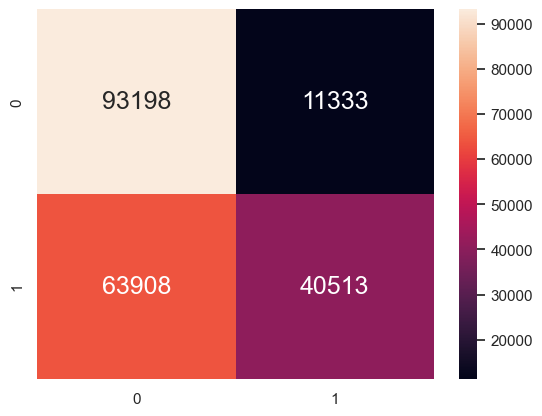

In [59]:
import seaborn as sb
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6373503662676434

TPR Test :	 0.3850237558832058
TNR Test :	 0.8902976230406296

FPR Test :	 0.10970237695937032
FNR Test :	 0.6149762441167942


<AxesSubplot:>

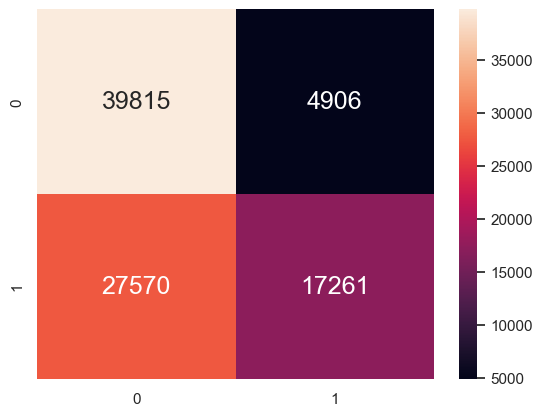

In [60]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Now they are more balanced. But after upsampling, the accuracy dropped to around `0.64`. But it’s OK, We now try Updated version of Decision Tree, random forest, to try to improve the accuracy.

* We will also use this upsampled dataset for `random forest`.

## 3.3 Random Forest

`Random forest` is essentially a collection of `decision trees`. The individual decision trees in the random forest are built using a subset of the training data and a subset of the input features, which helps to reduce overfitting and improve the generalization ability of the model. 


In [61]:
## We will still use the upsized data for the future model fitting.

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors

y = pd.DataFrame(ohe_data_up['correct'])
# y = column_or_1d(y, warn=True)
# We using labe_lencoder to solve y data type issues.
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the target variable
y = le.fit_transform(np.ravel(y))

## Here We also drop session_id as it's not related to model
# X = pd.DataFrame(new_data.drop('correct', axis = 1))
X = ohe_data_up.drop(columns=['correct', 'session_id'])
## While running we encountered "NaN" value warning, it turned out in value 'hover_duration' there's MISSING data points. We replace NaN with mean value of all hover_time.
X = X.fillna(X.mean())

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [62]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=1000)

Train Data
Accuracy  :	 0.6169024464948888

TPR Train :	 0.35892743096266216
TNR Train :	 0.8770147532317747

FPR Train :	 0.12298524676822528
FNR Train :	 0.6410725690373378


<AxesSubplot:>

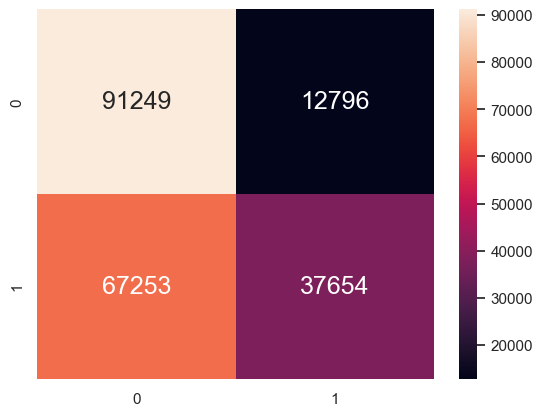

In [63]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6183893157048419

TPR Test :	 0.35449317848686435
TNR Test :	 0.87725352268454

FPR Test :	 0.12274647731546
FNR Test :	 0.6455068215131357


<AxesSubplot:>

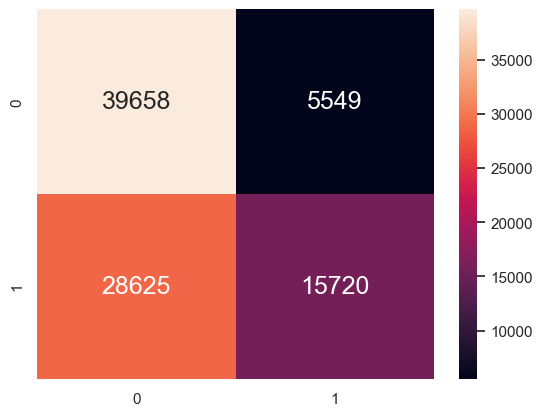

In [64]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

This is only a `random` random forest under hyperparameter `(4,1000)`. Now we use cross validation to determine the best random forest model hyperparameter and fits in.

## 3.4 Updated Random Forest with Cross-validation's help for Hyper-parameters

In [65]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors

y = pd.DataFrame(ohe_data_up['correct'])
# y = column_or_1d(y, warn=True)
# We using labe_lencoder to solve y data type issues.
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
le = LabelEncoder()
# Fit and transform the target variable
y = le.fit_transform(np.ravel(y))

## Here We also drop session_id as it's not related to model
# X = pd.DataFrame(new_data.drop('correct', axis = 1))
X = ohe_data_up.drop(columns=['correct', 'session_id'])
## While running we encountered "NaN" value warning, it turned out in value 'hover_duration' there's MISSING data points. We replace NaN with mean value of all hover_time.
X = X.fillna(X.mean())

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [66]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 400, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 2-fold cross-validation， initially 5
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [68]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=700)
0.6560693150361503


Thus we use those two hyper parameter for `random forest`

In [69]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 200,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

Train Data
Accuracy  :	 0.6620802863815614

TPR Train :	 0.5011574959822453
TNR Train :	 0.8231880171621208

FPR Train :	 0.17681198283787924
FNR Train :	 0.49884250401775465


<AxesSubplot:>

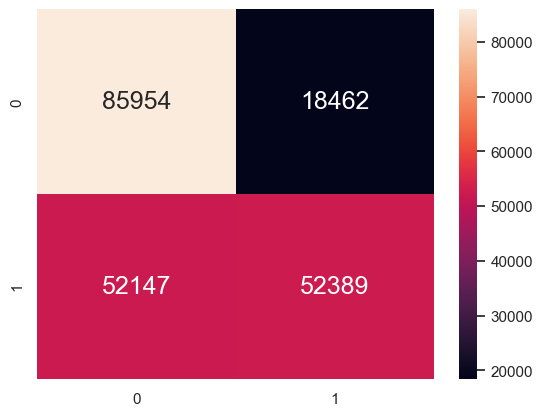

In [70]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6562444166517777

TPR Test :	 0.4982780212899186
TNR Test :	 0.8137880274779196

FPR Test :	 0.18621197252208047
FNR Test :	 0.5017219787100814


<AxesSubplot:>

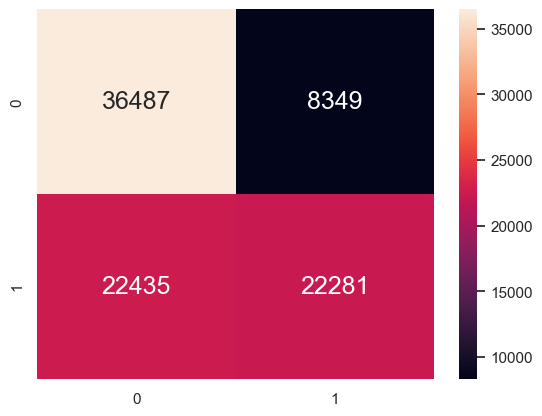

In [71]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Again, we use confusion matrics to obtain the accuracy. 
And it turned out to be around `0.66`. 
Next, we try a nother new model, `XGBoost`


## 3.5 XGBoost

In [72]:
import pandas as pd, numpy as np, gc
from sklearn.model_selection import KFold, GroupKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### Preprocessing

`targets` is the dataset reading from the train_labels.
* A simple preprocessing on this dataset is to seperate the `'session_id'` and `'correct'` of each response  

In [73]:
targets = pd.read_csv('train_labels.csv')
targets['session'] = targets.session_id.apply(lambda x: int(x.split('_')[0]) )
targets['q'] = targets.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

The preprocessed data we use in this model is `ohe_data`

In [74]:
df = ohe_data
# Change the position of 'qns'
tmp = df['qns']
df = df.drop('qns', axis=1)
df.insert(1, 'qns', tmp)
df = df.set_index('session_id')
# Drop 'correct' column
df = df.drop('correct', axis=1)
df

,qns,elapsed_time,avg_page,fullscreen_flag,hover_duration,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click
session_id,,,,,,,,,,,,,
20090312431273200,1,194860,0,1,2389.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,2,194860,0,1,2389.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,3,194860,0,1,2389.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,4,499235,0,1,969.333313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,5,499235,0,1,969.333313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100221145014656,14,5487952,1,1,669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22100221145014656,15,5487952,1,1,669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22100221145014656,16,5487952,1,1,669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Defind the FEATURES

`CATS` is the list that store all the columns with the category values  
`NUMS` is the list that store all the columns with the numerical values  
`EVENTS` is the list that store different types of variables in the "event_name" column

In [75]:
CATS = ['event_name']
NUMS = ['elapsed_time','avg_page','fullscreen_flag','hover_duration']

# https://www.kaggle.com/code/kimtaehun/lightgbm-baseline-with-aggregated-log-data
EVENTS = ['person_click','object_click',
          'map_hover','notification_click','map_click','observation_click',
          'checkpoint']

`FEATURES` is the list of all the columns that could be fitted into the models  
`ALL_USERS` is the list of students

In [76]:
FEATURES = [c for c in df.columns if c != 'qns']
print('We will train with', len(FEATURES) ,'features')
ALL_USERS = df.index.unique()
print('We will train with', len(ALL_USERS) ,'users info')

We will train with 12 features
We will train with 11779 users info


### XGBoost
* (eXtreme Gradient Boosting) is an open-source, scalable, and efficient machine learning library used for building gradient boosting models. It is designed to be highly optimized for performance and accuracy, and it is widely used in various machine learning tasks, including classification, regression, and ranking. The basic idea behind boosting is to combine many weak models to create a strong model that can make accurate predictions.

<b>Parameters:</b>  
    `'objective'`: The objective function for the binary classification problem. `'binary:logistic'`is used in this case.  
    `'eval_metric'`: The evaluation metric to be used during training.`'logloss'` is used in this case.  
    `'learning_rate'`: This sets the learning rate.  
    `'max_depth'`: This sets the maximum depth of each tree in the ensemble.  
    `'n_estimators'`: This specifies the maximum number of boosting rounds (or trees) to be built.  
    `'early_stopping_rounds'`: This parameter enables early stopping during training based on a validation metric.  
    `'tree_method'`: This sets the tree construction method to 'hist', which uses histogram-based binning for tree building.  
    `'subsample'`: This sets the subsampling rate.  
    `'colsample_bytree'`: This sets the fraction of features (columns) to be randomly sampled for each tree during training.  
    `'use_label_encoder'` : This specifies whether to use label encoding for categorical features.  

<b>Evaluation:</b>  
   * There are 4 parameters: `'learning_rate'`, `'max_depth'`, `'n_estimators'`, `'subsample'`, mainly affect the performance of this model  
       * `'learning_rate'`: A lower learning rate typically results in slower but more accurate training. <b>0.5</b> is applied because it can result in a better accuracy while mainting the fast training speed
       * `'max_depth'`: A lower value, i.e. <b>4</b>, for max_depth can help prevent overfitting and reduce the complexity of the model
       * `'n_estimators'`: A larger value for n_estimators can potentially improve the model's performance, but also increases training time. The estimator number over <b>1000</b> will result in a slower trainingg speed but little improvement of the performance 
       * `'subsample'`: Subsampling can help reduce overfitting and improve the training speed. 

### Fit and Train the model

In [77]:
gkf = GroupKFold(n_splits=5)
oof = pd.DataFrame(data=np.zeros((len(ALL_USERS),18)), index=ALL_USERS)
models = {}

# COMPUTE CV SCORE WITH 5 GROUP K FOLD
for i, (train_index, test_index) in enumerate(gkf.split(X=df, groups=df.index)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)
    
    xgb_params = {
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 1000,
    'early_stopping_rounds': 50,
    'tree_method':'hist',
    'subsample':0.8,
    'colsample_bytree': 0.4,
    'use_label_encoder' : False}
    
    # ITERATE THRU QUESTIONS 1 THRU 18
    for t in range(1,19):
        grp = t
            
        # TRAIN DATA
        train_x = df.iloc[train_index]
        train_x = train_x.loc[train_x.qns == grp]
        train_users = train_x.index.values
        train_y = targets.loc[targets.q==t].set_index('session').loc[train_users]
        
        # VALID DATA
        valid_x = df.iloc[test_index]
        valid_x = valid_x.loc[valid_x.qns == grp]
        valid_users = valid_x.index.values
        valid_y = targets.loc[targets.q==t].set_index('session').loc[valid_users]
        
        # TRAIN MODEL        
        clf =  XGBClassifier(**xgb_params)
        clf.fit(train_x[FEATURES].astype('float32'), train_y['correct'],
                eval_set=[ (valid_x[FEATURES].astype('float32'), valid_y['correct']) ],
                verbose=0)
        print(f'{t}({clf.best_ntree_limit}), ',end='')
        
        # SAVE MODEL, PREDICT VALID OOF
        models[f'{grp}_{t}'] = clf
        oof.loc[valid_users, t-1] = clf.predict_proba(valid_x[FEATURES].astype('float32'))[:,1]
        
    print()

#########################
### Fold 1
#########################


D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


1(104), 2(152), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


3(119), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(208), 5(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(183), 7(77), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(84), 9(80), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(91), 11(142), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


12(106), 13(91), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


14(214), 15(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


16(62), 17(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(231), 
#########################
### Fold 2
#########################


D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


1(116), 2(112), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


3(177), 4(205), 5(131), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(166), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


7(213), 8(54), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


9(133), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(151), 11(59), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


12(83), 13(57), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


14(104), 15(141), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


16(88), 17(44), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(175), 
#########################
### Fold 3
#########################
1(47), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(170), 3(105), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(72), 5(57), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(67), 7(75), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(47), 9(91), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(47), 11(109), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


12(104), 13(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


14(177), 15(113), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


16(100), 17(123), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(143), 
#########################
### Fold 4
#########################
1(76), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(110), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


3(130), 4(139), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


5(114), 6(170), 7(98), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(36), 9(92), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(76), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


11(221), 12(102), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


13(85), 14(143), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


15(150), 16(64), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


17(58), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(240), 
#########################
### Fold 5
#########################
1(69), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(159), 3(86), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(88), 5(70), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(142), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


7(142), 8(68), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


9(201), 10(111), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


11(68), 12(122), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


13(93), 14(64), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


15(69), 16(58), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


17(109), 18(80), 


D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [78]:
# PUT TRUE LABELS INTO DATAFRAME WITH 18 COLUMNS
true = oof.copy()
for k in range(18):
    # GET TRUE LABELS
    tmp = targets.loc[targets.q == k+1].set_index('session').loc[ALL_USERS]
    true[k] = tmp.correct.values

Using <b>Gradient Decent</b> to find the best threshold to distinguish the outcome

In [79]:
# FIND BEST THRESHOLD TO CONVERT PROBS INTO 1s AND 0s
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.4,0.81,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (oof.values.reshape((-1))>threshold).astype('int')
    m = f1_score(true.values.reshape((-1)), preds, average='macro')   
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 

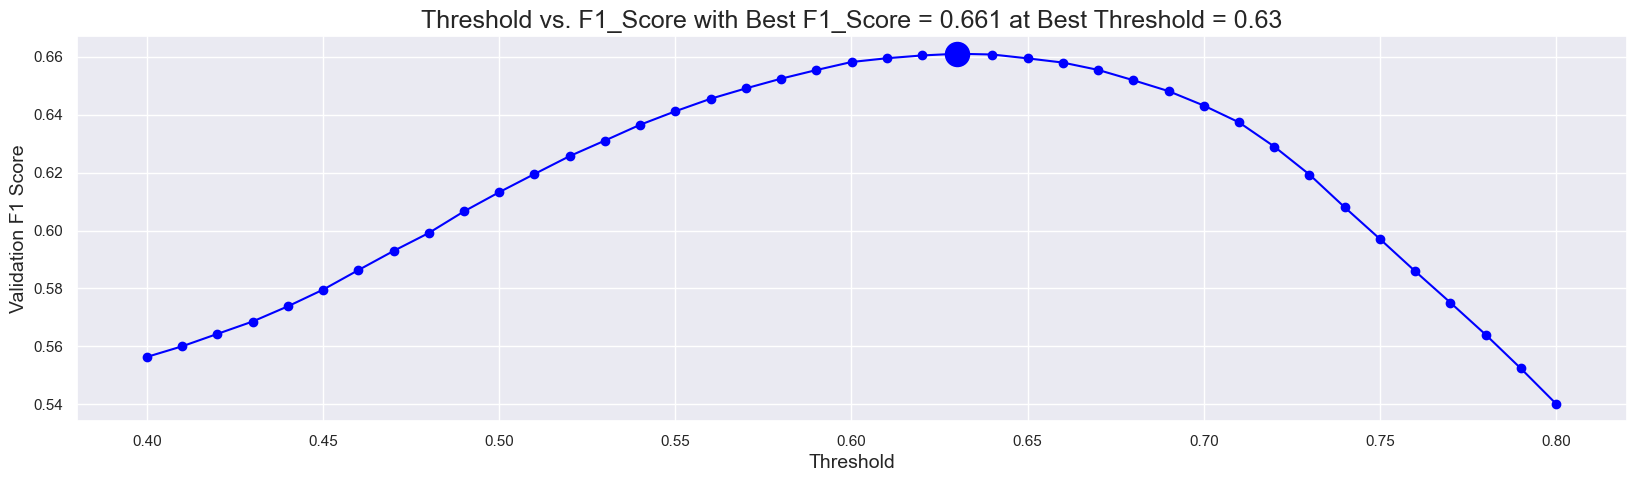

In [80]:
# PLOT THRESHOLD VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. F1_Score with Best F1_Score = {best_score:.3f} at Best Threshold = {best_threshold:.3}',size=18)
plt.show()

<b>F1 Score is the value that refect the performance of the XGBoost algorithm.</b>  
  * F1 score = 2 * (precision * recall) / (precision + recall)
  * Precision = TP / (TP + FP)
  * Recall = TP / (TP + FN)  
  
<b>The higher score refers to the better performance.</b>

In [81]:
print('When using optimal threshold...')
for k in range(18):
        
    # COMPUTE F1 SCORE PER QUESTION
    m = f1_score(true[k].values, (oof[k].values>best_threshold).astype('int'), average='macro')
    print(f'Q{k}: F1 =',m)
    
# COMPUTE F1 SCORE OVERALL
m = f1_score(true.values.reshape((-1)), (oof.values.reshape((-1))>best_threshold).astype('int'), average='macro')
print('==> Overall F1 =',m)

When using optimal threshold...
Q0: F1 = 0.5511777234800285
Q1: F1 = 0.4946370344945941
Q2: F1 = 0.48369340144040407
Q3: F1 = 0.5203604086012742
Q4: F1 = 0.4384117372136581
Q5: F1 = 0.5298364624697178
Q6: F1 = 0.5324714481164514
Q7: F1 = 0.4617786961066148
Q8: F1 = 0.5262828802806839
Q9: F1 = 0.3506259316822949
Q10: F1 = 0.5549693112459986
Q11: F1 = 0.4633227472982315
Q12: F1 = 0.4218044374631848
Q13: F1 = 0.5386907581057554
Q14: F1 = 0.3551834798927248
Q15: F1 = 0.426453072996281
Q16: F1 = 0.5077204200892635
Q17: F1 = 0.4873122959738847
==> Overall F1 = 0.6610269699322504


The best overall F1 Score we got for XGBoost turns out to be `0.66`

# 4. Infer test data using API provided by Kaggle 
 Note that this part can `only` be run on kaggle notebook, we only include for our future submission reference

 Define Preprocessing as function

In [82]:
def feature_engineer(test):

#     test = pd.read_csv("test.csv")
  #  test = test.drop(['session_level'], axis=1)
    student_num = test['session_id'].nunique()

    # test = (pl.from_pandas(test)
    #           .drop(["fullscreen", "hq", "music"])
    #           .with_columns(columns))
    test = test.drop(['music','hq','fullscreen'], axis=1)
    test['elapsed_time'] = test['elapsed_time'].astype(np.uint32)
    test['level'] = test['level'].astype(np.uint8)
    test['room_coor_x'] = test['room_coor_x'].astype(np.float32)
    test['room_coor_y'] = test['room_coor_y'].astype(np.float32)
    test['screen_coor_x'] = test['screen_coor_x'].astype(np.float32)
    test['screen_coor_y'] = test['screen_coor_y'].astype(np.float32)
    test['hover_duration'] = test['hover_duration'].astype(np.float32)
    columns_to_convert = ['session_id','event_name','name','text','fqid','room_fqid','text_fqid','level_group']
    for column in columns_to_convert:
        test[column] = test[column].astype('category')
    test = test.sort_values(['session_id', 'level_group'], ascending=[True, True])


    #Divide 1
    data1 = test[test['level_group'] == '0-4']
    # display(data1.head(30))
    # factor 1
    total_elapsed_time = data1.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

    # factor 2
    filtered_data = data1[(data1['event_name'] != 'navigate_click') & (data1['event_name'] != 'cutscene_click')]
    display(filtered_data)
    mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

    # factor 3
    avg_page = data1.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
    avg_page = avg_page.rename(columns={'page': 'avg_page'})

    # factor 4

    # Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
    max_values = data1.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

    # Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
    max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

    # Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
    fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

    # Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
    unique_session_ids = data1['session_id'].unique()
    unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
    unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

    # Rename the 'fullscreen' column to 'fullscreen_flag'
    unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



    # factor 5
    avg_hover_duration = data1.groupby(['session_id'])['hover_duration'].mean().reset_index()

    # Merge
    temp_level_group = pd.DataFrame({'level_group': ['0-4'] * student_num})
    part1 = pd.concat([avg_hover_duration['session_id'], 
                       total_elapsed_time['elapsed_time'], 
                       mode_event_name['event_name'], avg_page['avg_page'],
                         unique_session_ids_fullscreen['fullscreen_flag'],
                           avg_hover_duration['hover_duration'], 
                             temp_level_group['level_group']]
                              , axis = 1)

    values = [1, 2, 3]
    part1 = pd.concat([part1]*len(values), ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)
    # unique_p1 = part1['session_id'].nunique()
    # print(unique_p1)
    
    # for i in range(0,3*student_num):
    #     if (i%3) == 0:
    #         part1.iloc[i, -1] = 1
    #     elif (i%3) == 1:
    #         part1.iloc[i, -1] = 2
    #     elif (i%3) == 2:
    #         part1.iloc[i, -1] = 3

    for i in range(0,3*student_num):
        part1.iloc[i, -1] = values[i % len(values)]

    part1 = part1.rename(columns={'level_group': 'qns'})
    # part1
    # # display(part1)


    #Divide 2
    data2 = test[test['level_group'] == '5-12']
    # factor 1
    total_elapsed_time = data2.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

    # factor 2
#      & (data2['event_name'] != 'cutscene_click')
#     filtered_data = data2[(data2['event_name'] == 'person_click') & (data2['event_name'] == 'object_click')]
#     filtered_data = filtered_data.dropna(subset=['event_name']).reset_index(drop=True)
#     filtered_data = data2
#     display(filtered_data)
    mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()
#     display(mode_event_name)
    # factor 3
    avg_page = data2.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
    avg_page = avg_page.rename(columns={'page': 'avg_page'})

    # factor 4

    # Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
    max_values = data2.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

    # Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
    max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

    # Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
    fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

    # Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
    unique_session_ids = data2['session_id'].unique()
    unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
    unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

    # Rename the 'fullscreen' column to 'fullscreen_flag'
    unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



    # factor 5
    avg_hover_duration = data2.groupby(['session_id'])['hover_duration'].mean().reset_index()

    # Merge
    temp_level_group = pd.DataFrame({'level_group': ['5-12'] * student_num})
    part2 = pd.concat([avg_hover_duration['session_id'], 
                       total_elapsed_time['elapsed_time'], 
                       mode_event_name['event_name'], avg_page['avg_page'],
                         unique_session_ids_fullscreen['fullscreen_flag'],
                           avg_hover_duration['hover_duration'], 
                             temp_level_group['level_group']]
                              , axis = 1)

    values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    part2 = pd.concat([part2]*len(values), ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

    for i in range(0,10*student_num):
        part2.iloc[i, -1] = values[i % len(values)]

    part2 = part2.rename(columns={'level_group': 'qns'})


    # Divide 3
    data3 = test[test['level_group'] == '13-22']
    # factor 1
    total_elapsed_time = data1.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

    # factor 2
    filtered_data = data1[(data1['event_name'] != 'navigate_click') & (data1['event_name'] != 'cutscene_click')]
    mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

    # factor 3
    avg_page = data1.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
    avg_page = avg_page.rename(columns={'page': 'avg_page'})

    # factor 4

    # Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
    max_values = data1.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()
    
    # Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
    max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

    # Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
    fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

    # Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
    unique_session_ids = data1['session_id'].unique()
    unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
    unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

    # Rename the 'fullscreen' column to 'fullscreen_flag'
    unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



    # factor 5
    avg_hover_duration = data1.groupby(['session_id'])['hover_duration'].mean().reset_index()

    # Merge
    temp_level_group = pd.DataFrame({'level_group': ['0-4'] * student_num})
    part3 = pd.concat([avg_hover_duration['session_id'], 
                       total_elapsed_time['elapsed_time'], 
                       mode_event_name['event_name'], avg_page['avg_page'],
                         unique_session_ids_fullscreen['fullscreen_flag'],
                           avg_hover_duration['hover_duration'], 
                             temp_level_group['level_group']]
                              , axis = 1)


    part3 = pd.concat([part3]*5, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)
    values = [14, 15, 16, 17, 18]
    for i in range(0,5*student_num):
        part3.iloc[i, -1] = values[i % len(values)]

    part3 = part3.rename(columns={'level_group': 'qns'})


    # FINAL Merge AND OHE
    new_data = pd.concat([part1, part2, part3], axis = 0).reset_index().drop(['index'], axis=1)
    # new_data
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()

    # OneHotEncoding of categorical predictors (not the response)
    new_data_cat = new_data[['event_name']]
    ohe.fit(new_data_cat)
    new_data_cat_ohe = pd.DataFrame(ohe.transform(new_data_cat).toarray(), 
                                      columns=ohe.get_feature_names_out(new_data_cat.columns))
    new_data_num = new_data[['session_id','elapsed_time','avg_page','fullscreen_flag','hover_duration','qns']]
    # new_data_res = new_data['correct']
    ohe_data = pd.concat([new_data_num, new_data_cat_ohe], 
                               sort = False, axis = 1).reindex(index=new_data_num.index)
    return ohe_data

 Import API

In [ ]:
import jo_wilder
jo_wilder.make_env.__called__ = False
env = jo_wilder.make_env()
iter_test = env.iter_test()

Fits in model and generate results

In [ ]:
count = 0
for (test, sample_submission) in iter_test:
    if count == 0:
        print(sambple_submission)
        print(test.head())
        print(test.shape)

    df= feature_engineer(test)

    df=df.drop(['session_id'], axis = 1)
#     event_name_map_click           212022 non-null  float64
#  1   event_name_map_hover           212022 non-null  float64
#  2   event_name_notebook_click      212022 non-null  float64
#  3   event_name_notification_click  212022 non-null  float64
#  4   event_name_object_click        212022 non-null  float64
#  5   event_name_object_hover        212022 non-null  float64
#  6   event_name_observation_click   212022 non-null  float64
#  7   event_name_person_click   
    MISSING_EVENTS = ['event_name_map_click','event_name_map_hover','event_name_notebook_click',
                     'event_name_notification_click','event_name_object_hover'
                      ,'event_name_observation_click']
    for event in MISSING_EVENTS:
        df[event] = 0.0
        
    df = df.reindex(columns=['elapsed_time', 'avg_page', 'fullscreen_flag','hover_duration','qns','event_name_map_click','event_name_map_hover','event_name_notebook_click',
                     'event_name_notification_click','event_name_object_click','event_name_object_hover'
                      ,'event_name_observation_click','event_name_person_click'])
    # fill missing values with the mean of the column
    df.fillna(df.mean(), inplace=True)

#    print(df.head())

# Note here in this example we fit into random forest model    
    for t in range(1,19):
        p = rforest.predict(df)
#        print(len(p))
#       print(len(sample_submission))
        mask = sample_submission.session_id.str.contains(f'q{t}')
        sample_submission.loc[mask,'correct'] = p

    env.predict(sample_submission)

In [ ]:
pd.read_csv('submission.csv').head(10)

# 5. Conclusion

In conclusion, after tentative submission to kaggle with our trained RANDOM FOREST MODEL and XGBOOST MODEL, which fits in the hidden test data provided by Kaggle and obtained the prediction results and by comparing with the hidden test data, our accuracy is respectively `0.64` and `0.67` (Unfortunately we can't run without Kaggle Notebook and currently their API for this competition is in problem as discussed in presentation ). 

We can say our model is as expectedly efficient for this problem.

* currently we’re ranking around 1000 in this competition with 0.676 being our best accuarcy


One week ago, Kaggle suddenly changed everything from dataset, test set, submission API and extended the deadline for another 1 month.
Heated discussions have been going on for days as we suddenly found updated API don’t support all oldnotebooks and no one can submit properly currently.
So our future work will be: keep training our models after final exam, then try our best to climb as high as possible as leaderboard.

